In [1]:
import numpy as np
import ROOT as rt
from ROOT import std
from larcv import larcv
from larlitecv import larlitecv
import cv2
print "OpenCV Version: ",cv2.__version__
from matplotlib import pyplot as plt
%matplotlib inline

Welcome to JupyROOT 6.08/06
OpenCV Version:  3.2.0


## Set Inputs

In [2]:
cfg_file = "tagger.cfg"
taggerout_larcv="/Users/barnchri/dllee_unified/larlitecv/app/TaggerCROI/bin/tagger_anaout_larcv_16_06_2017.root"
taggerout_larlite="/Users/barnchri/dllee_unified/larlitecv/app/TaggerCROI/bin/tagger_anaout_larlite_16_06_2017.root"

## Define Drawing Functions

In [3]:
# UTILITY FUNCTIONS

# Conver Image2D into numpy array usable by OpenCV draw functions
def make_img( img2d, minval, maxval, colormap=cv2.COLORMAP_BONE ):
    imgcp = larcv.Image2D(img2d)
    img_np = np.transpose( larcv.as_ndarray( imgcp ), (1,0) )
    img_np[ img_np<minval ] = 0
    img_np -= minval
    img_np[ img_np>maxval ] = maxval
    img_np /= 255.0/(maxval-minval)
    img_cv = cv2.cvtColor( img_np, cv2.COLOR_GRAY2BGR )
    img_cv = cv2.applyColorMap(img_cv.astype(np.uint8), colormap )
    return img_cv

def draw_flashes( img2d, input_data ):
    meta = input_data.img_v.front().meta()
    #print "num of flash sets: ",input_data.opflashes_v.size()
    lastx = 0
    for iset in range(input_data.opflashes_v.size()):
        opflash_v = input_data.opflashes_v[iset]
        for iflash in range(opflash_v.size()):
            opflash = opflash_v[iflash]
            anode_tick = 3200.0 + opflash.Time()/0.5 + 30.0
            cathode_tick = anode_tick + 258.0/0.111436/0.5 - 90.0
            #print (iset,iflash),": anode=",anode_tick," cathode=",cathode_tick
            if anode_tick>meta.min_y() and anode_tick<meta.max_y():
                anode_row = meta.row(anode_tick)
                img2d = cv2.line( img2d, (0,anode_row), (meta.cols(),anode_row), (255,0,255) )
                img2d = cv2.putText( img2d, "A (%d,%d) %d"%(iset,iflash,anode_tick), (0,anode_row+5), cv2.FONT_HERSHEY_PLAIN, 2.0, (0,0,0) )
            if cathode_tick>meta.min_y() and cathode_tick<meta.max_y():
                cathode_row = meta.row(cathode_tick)
                img2d = cv2.line( img2d, (0,cathode_row), (meta.cols(),cathode_row), (0,255,255) )
                img2d = cv2.putText( img2d, "C (%d,%d) %d"%(iset,iflash,cathode_tick), (0,cathode_row+5), cv2.FONT_HERSHEY_PLAIN, 2.0, (0,0,0) )
    return

def draw_boundary_points( imgcv, spacepoint_v ):
    endtype_colors = {0:(0,0,255),   # top
                      1:(255,0,0),   # bot
                      2:(0,255,255), # upstream
                      3:(255,0,255), # downstream
                      4:(255,140,0), # anode
                      5:(85,107,47), # cathode
                      6:(189,183,107) # image ends
                      }
    for ipt in range(spacepoint_v.size()):
        sp = spacepoint_v.at(ipt)
        color = endtype_colors[ sp.type() ]
        imgcv = cv2.circle( imgcv, (sp.at(p).col, sp.at(p).row), 10, color, -1 )
    return

# Define a veriable for whether to save the images to a file or not.
save_images_to_file = False

In [4]:
tagger = larlitecv.CosmicRetagger( cfg_file, taggerout_larcv, taggerout_larlite )

[DataCoodinator] Initializing
[DataCoordinator] initializing filemanager for larcv
Hash: 6d0bd3122f638a1e582c076abd89ad5c
set idtreeproducer: modimg dtype=image2d
set idtreeproducer: croi dtype=partroi
File /Users/barnchri/dllee_unified/larlitecv/app/TaggerCROI/bin/tagger_anaout_larcv_16_06_2017.root file-flavor: d9bfd356facb67b2432ceddb664e489d number of events: 2244: 10700 1 75
  larcv loading 1 files.
[DataCoordinator] initializing filemanager for larlite
Hash: 41bab74add1a73aa470ffeb2bd5ccf10
File /Users/barnchri/dllee_unified/larlitecv/app/TaggerCROI/bin/tagger_anaout_larlite_16_06_2017.root flavor-hash: 719bccebc57bfbc8afa0a2358628e4e2 number of events: 2244: 10700 1 75
Index sizes: 2244 vs. entries: 2244
Final file list size: 0
  larlite loading 1 files.
    [NORMAL]  <open> Opening a file in READ mode: /Users/barnchri/dllee_unified/larlitecv/app/TaggerCROI/bin/tagger_anaout_larlite_16_06_2017.root
    [NORMAL]  <IOManager::prepare_input> Opening a file in READ mode: /Users/barn

In [5]:
tagger.printState()

"CosmicTagger State:  Config'd [true] Input [false] BoundaryTag [false] ThruMu [false] StopMu [false] Untagged [false] CROI [false]"

In [18]:
entry_i = 18
tagger.setEntry(entry_i)

In [19]:
processinput_ok = tagger.processInputImages()
print "Processed OK: ",processinput_ok
print tagger.printState()

--------------------
 Entry 18 : 10700 10 545
--------------------
     [ERROR]  <IOManager::get_data::L525> Invalid producer requested: boundarypixels for image2d
     [ERROR]  <IOManager::get_data::L525> Invalid producer requested: realspacehits for image2d
     [ERROR]  <IOManager::get_data::L525> Invalid producer requested: unused_topspacepts for pixel2d
     [ERROR]  <IOManager::get_data::L525> Invalid producer requested: unused_botspacepts for pixel2d
     [ERROR]  <IOManager::get_data::L525> Invalid producer requested: unused_upspacepts for pixel2d
     [ERROR]  <IOManager::get_data::L525> Invalid producer requested: unused_downspacepts for pixel2d
     [ERROR]  <IOManager::get_data::L525> Invalid producer requested: unused_anodepts for pixel2d
     [ERROR]  <IOManager::get_data::L525> Invalid producer requested: unused_cathodepts for pixel2d
     [ERROR]  <IOManager::get_data::L525> Invalid producer requested: unused_imgendpts for pixel2d
     [ERROR]  <IOManager::get_data::L52

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  


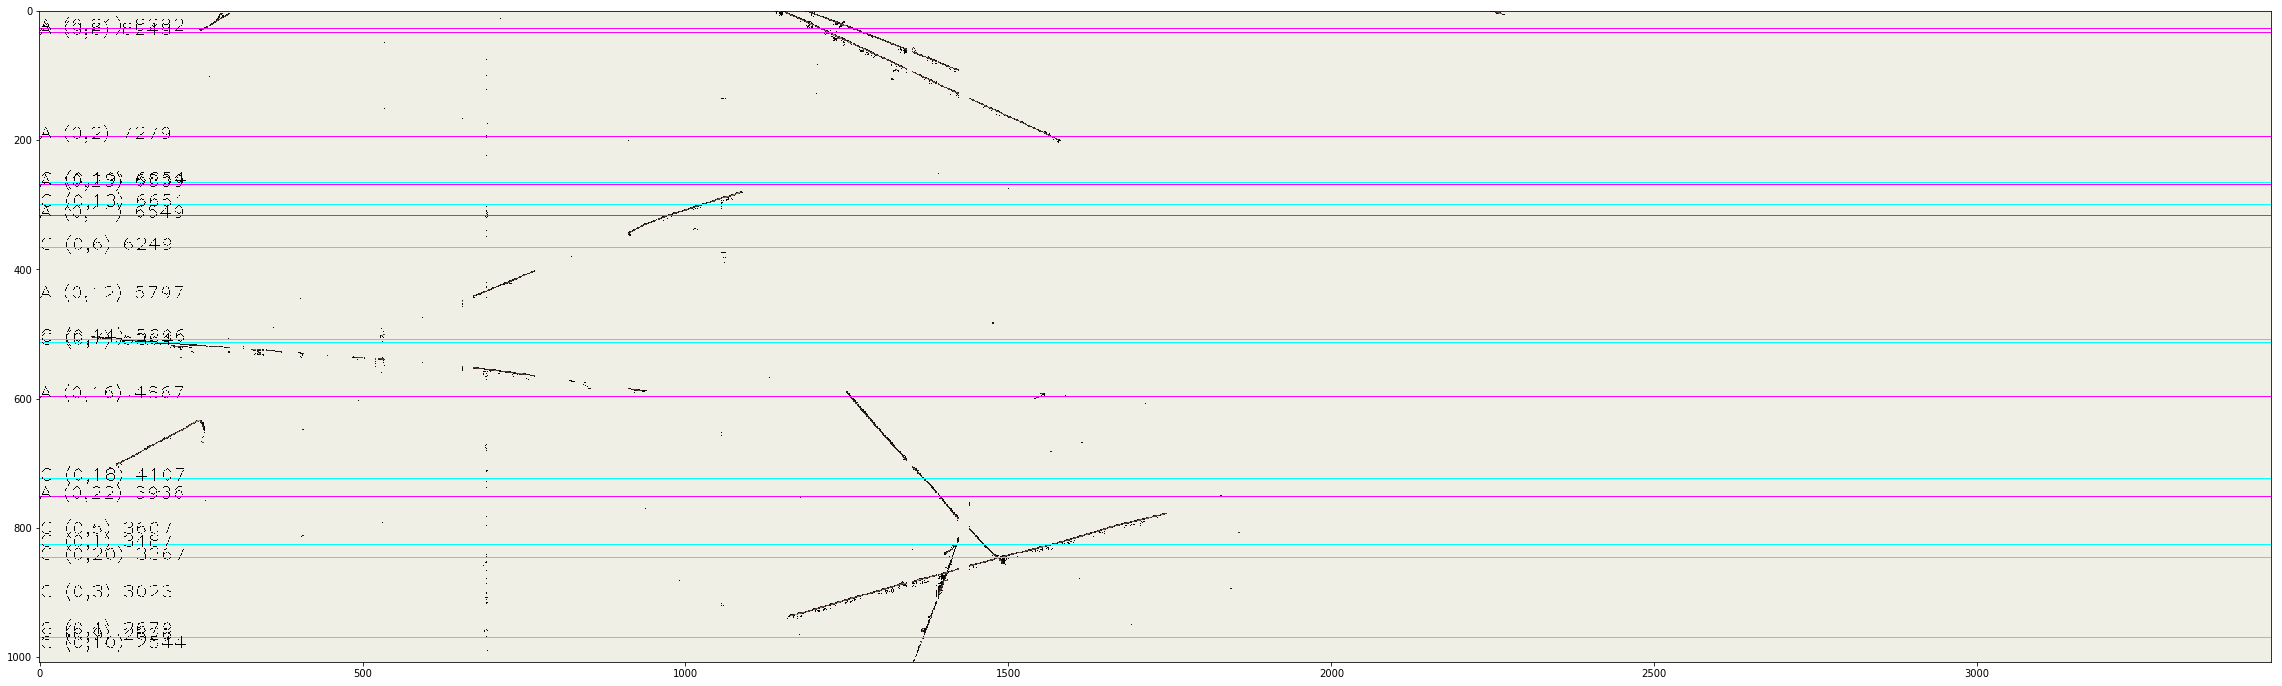

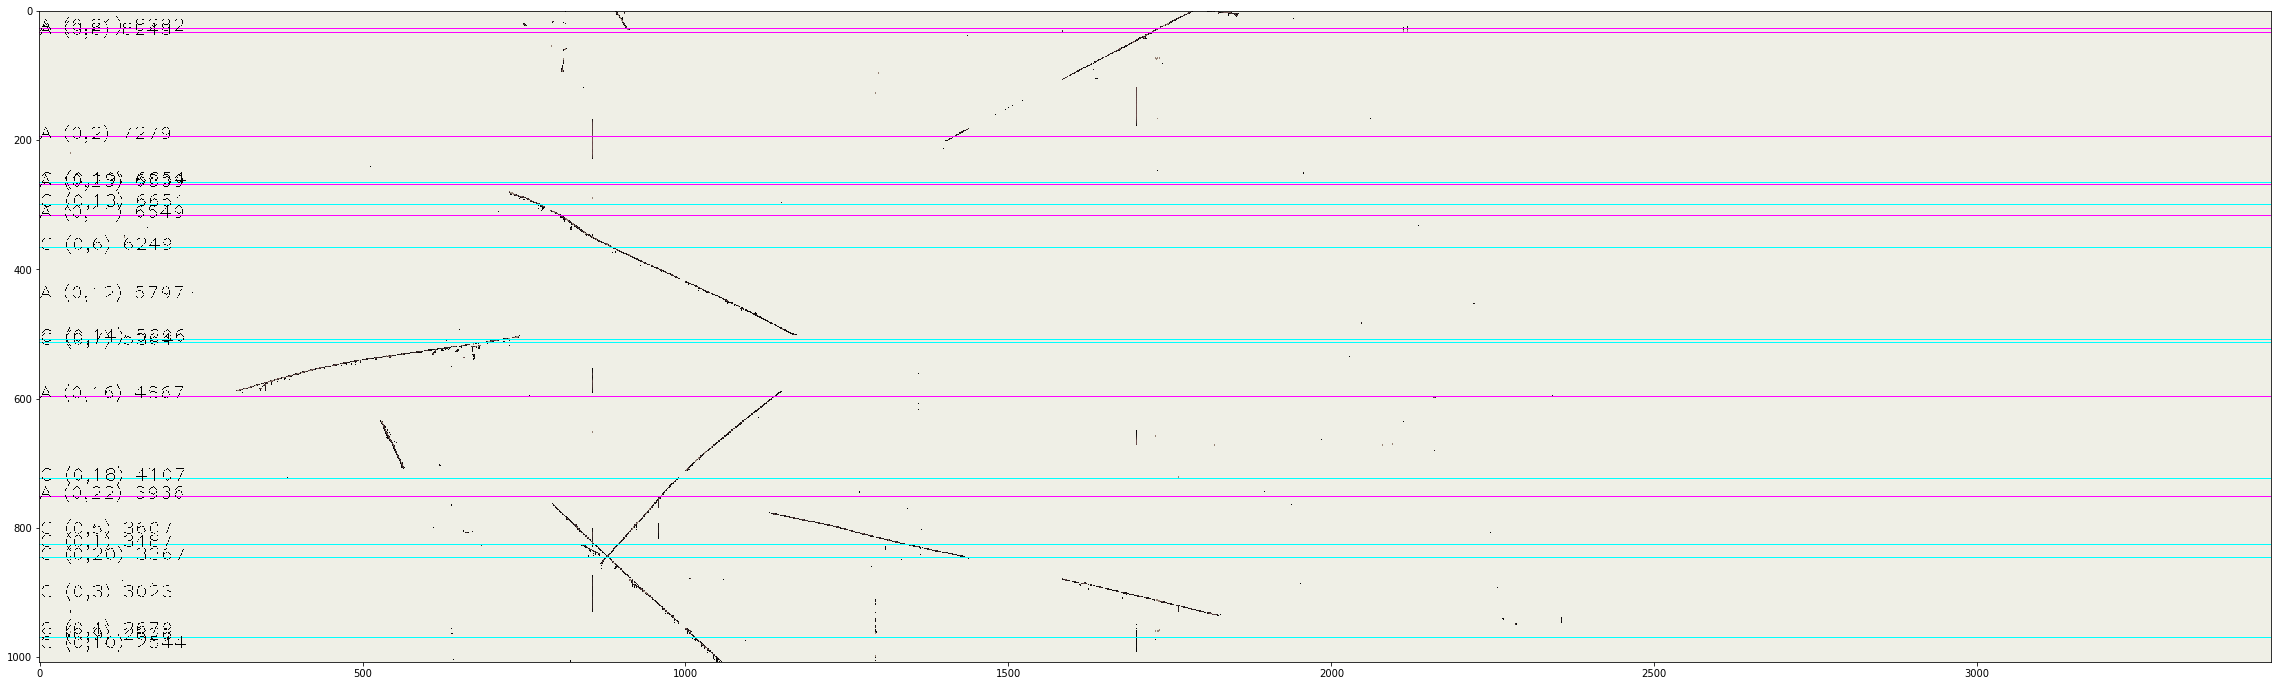

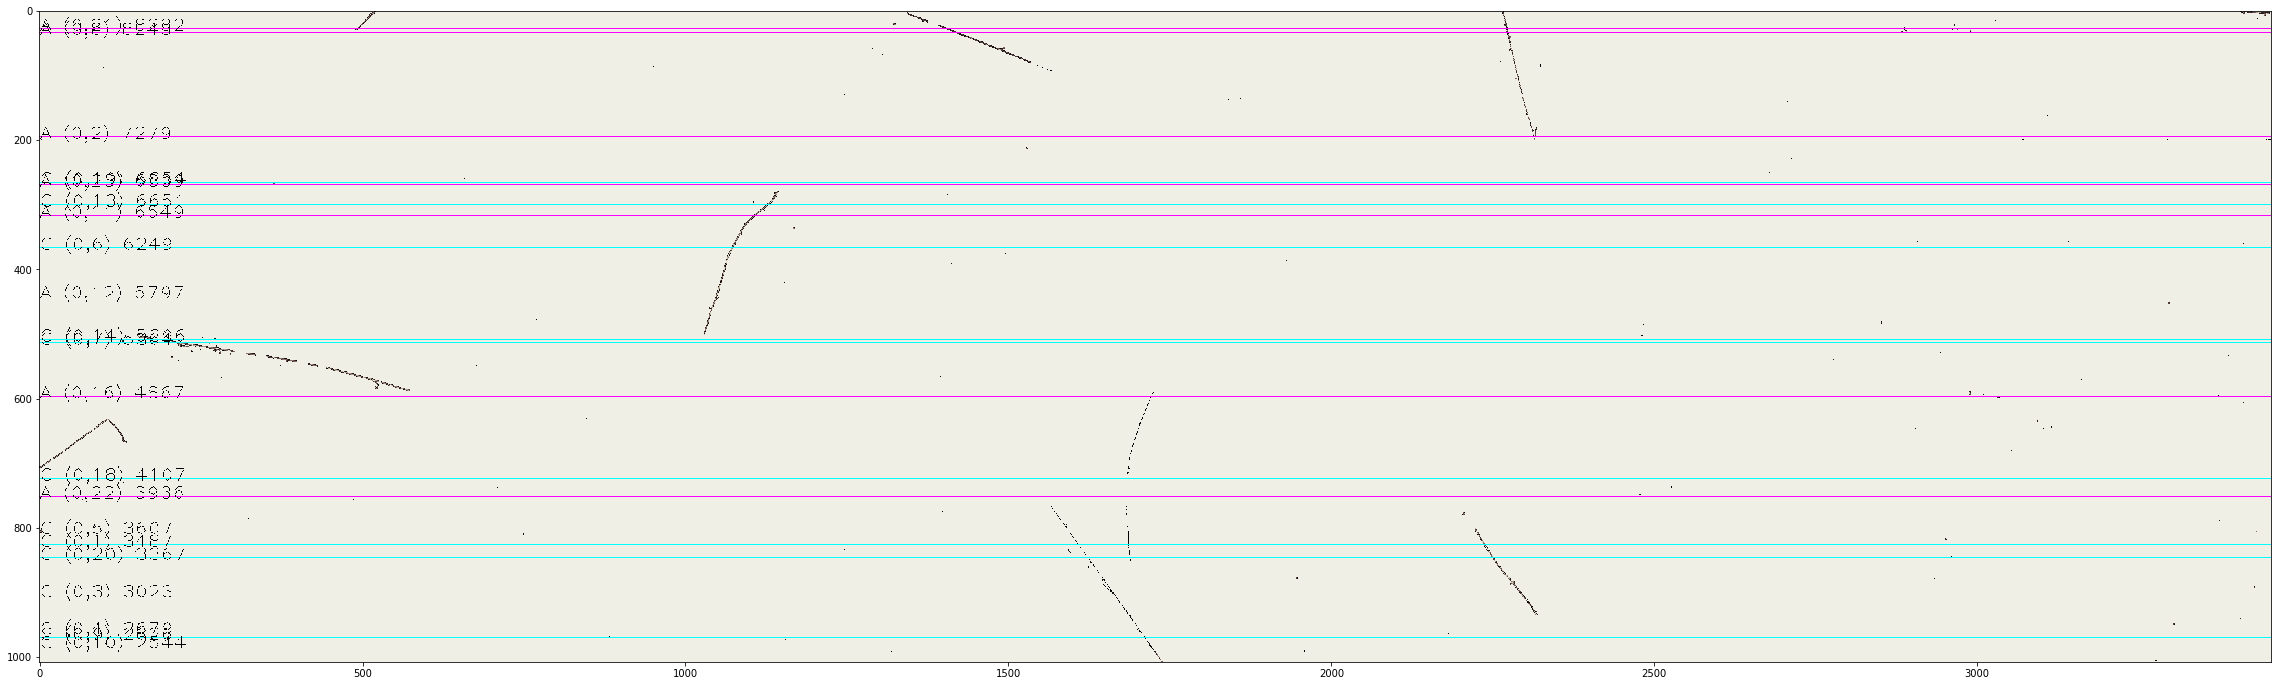

In [20]:
# Define Conversion of image2d to Plottable Input Images
inputdata = tagger.getInputData()
for p in range(inputdata.img_v.size()):
    img_cv = make_img( inputdata.img_v.at(p), 10, 500 )
    draw_flashes( img_cv, inputdata )
    plt.figure(figsize=(40,40))
    plt.imshow( img_cv )
    
    # Save the images to make it easier to compare the raw image to the ThruMu & StopMu tagged images.
    if save_images_to_file:
        plt.savefig('event_%dplane_img_%d_.png'% (entry_i, p))


In [21]:
# Find the boundary crossings to replicate the RunCosmicTagger process.
boundarytagger_ok = tagger.findBoundaryEnds()
tagger.printState()

"CosmicTagger State:  Config'd [true] Input [true] BoundaryTag [true] ThruMu [false] StopMu [false] Untagged [false] CROI [false]"

BoundaryMuonTaggerAlgo::searchforboundarypixels3D
Begin Boundary Pixel Search...
... hit search time: 5.3706 secs
Begin Clustering...
... clustering time: 5.34328 secs
boundary pixel search took 10.7139 secs
  hit collecting: 5.3706 secs
  clustering time: 5.34328 secs
  total number of combos found: 20753
Number of Flash Endpoints filtered: 1
Number of Same-type Endpoints filtered: 7


[ PLANE 0 ]
[ PLANE 1 ]
[ PLANE 2 ]


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  


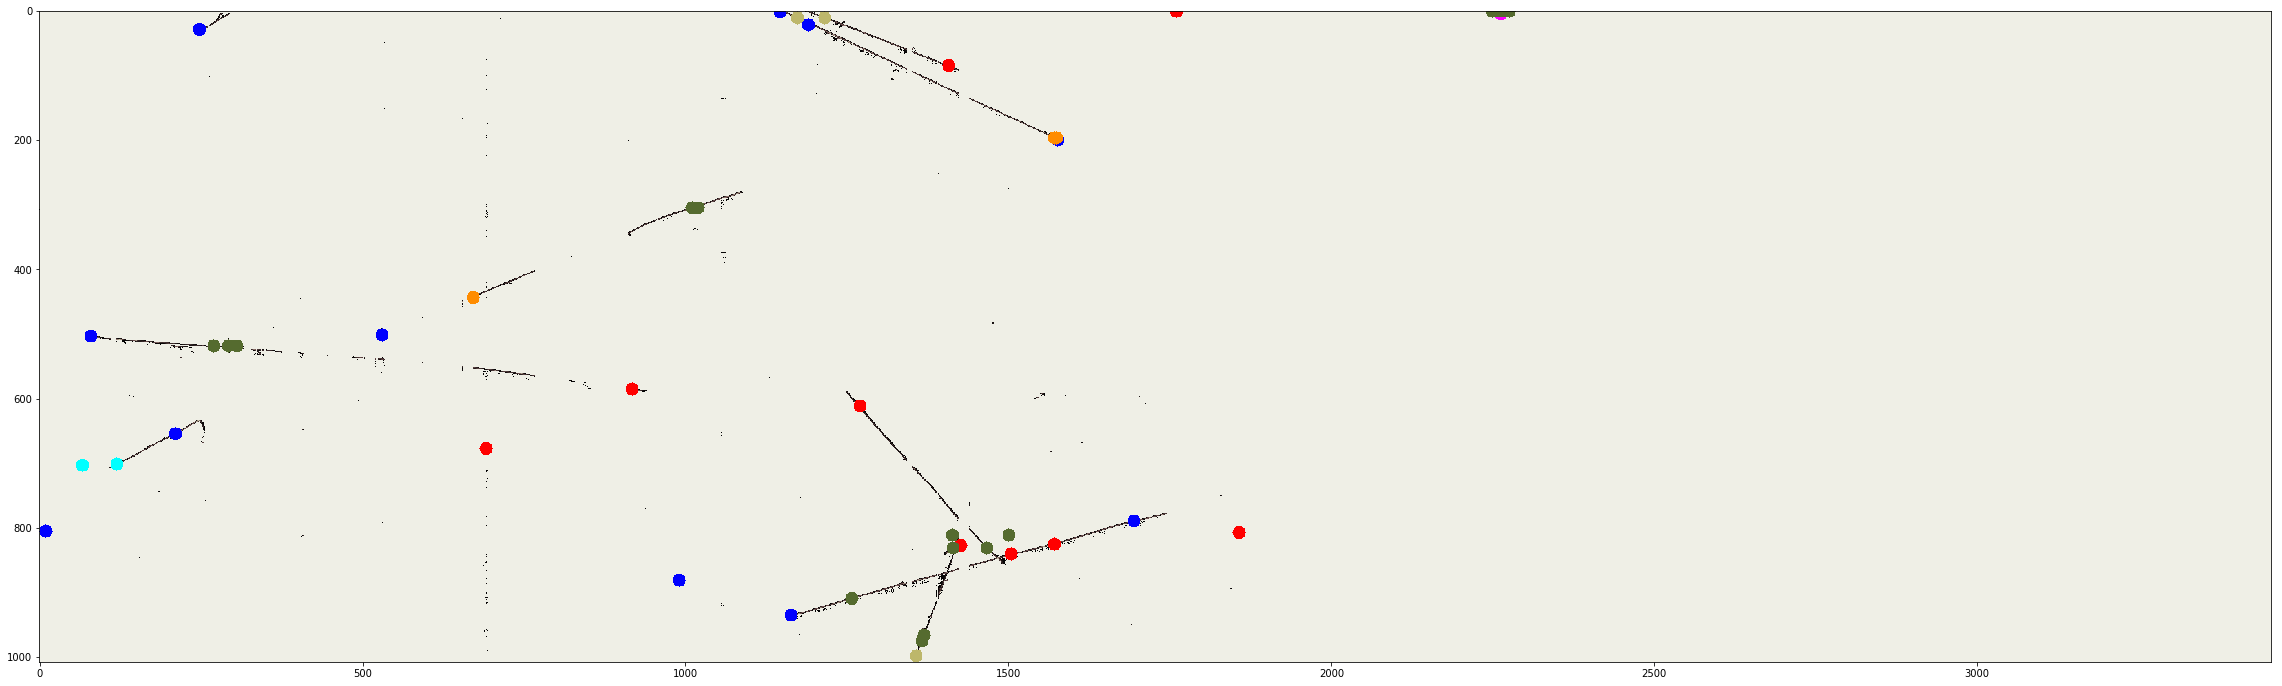

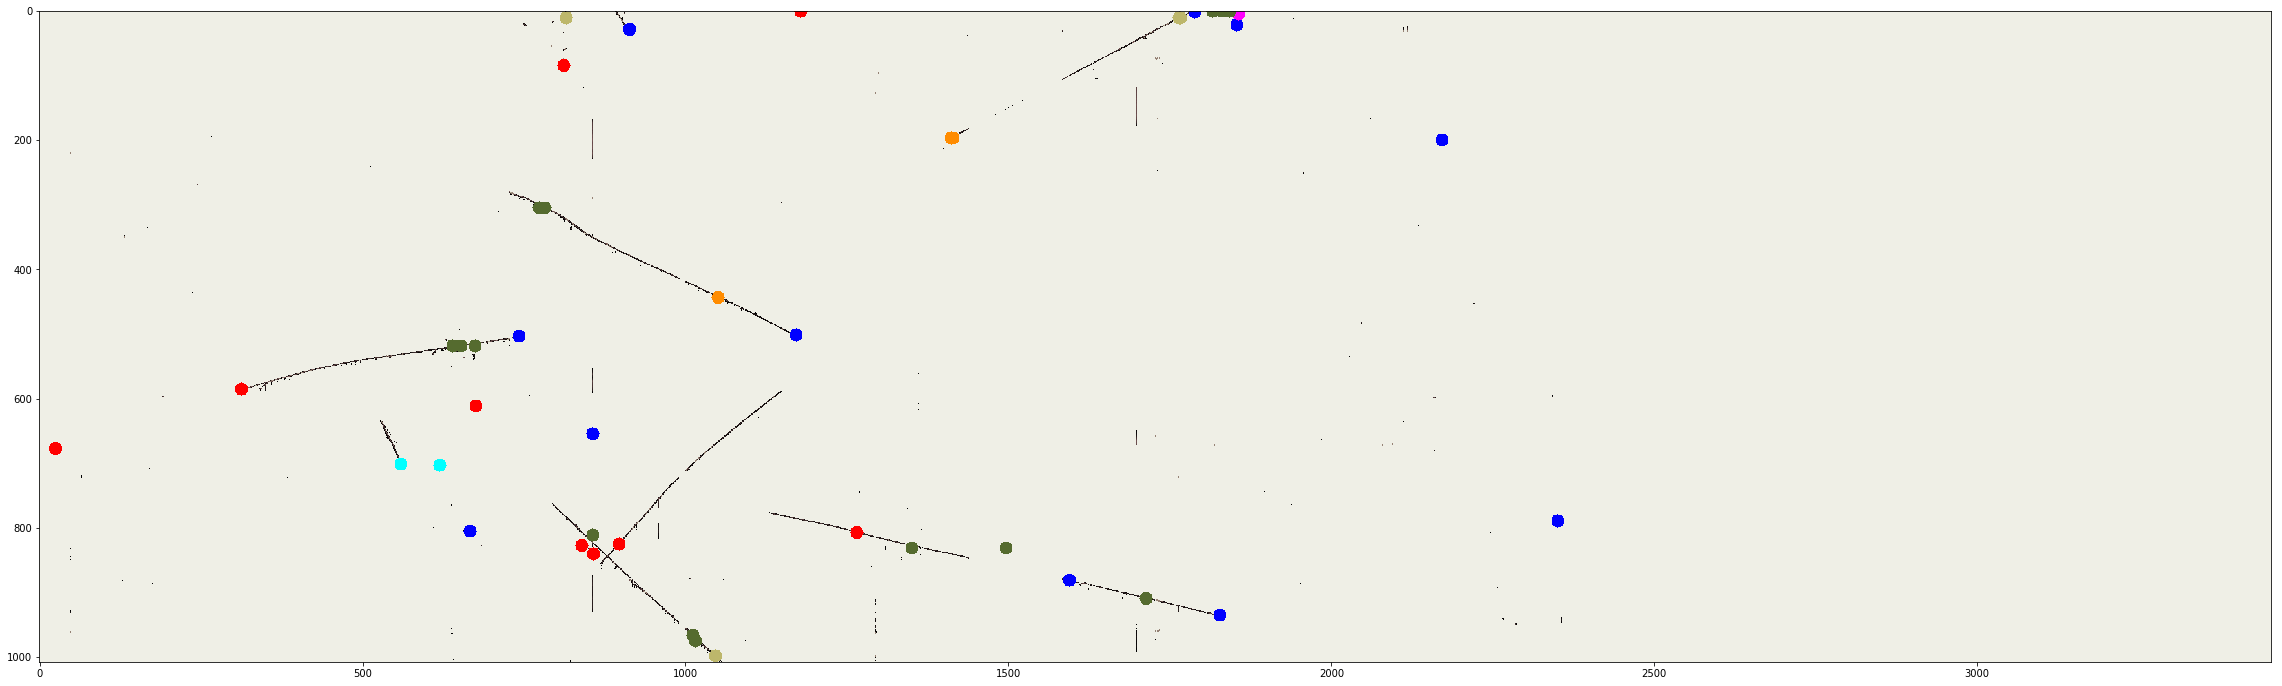

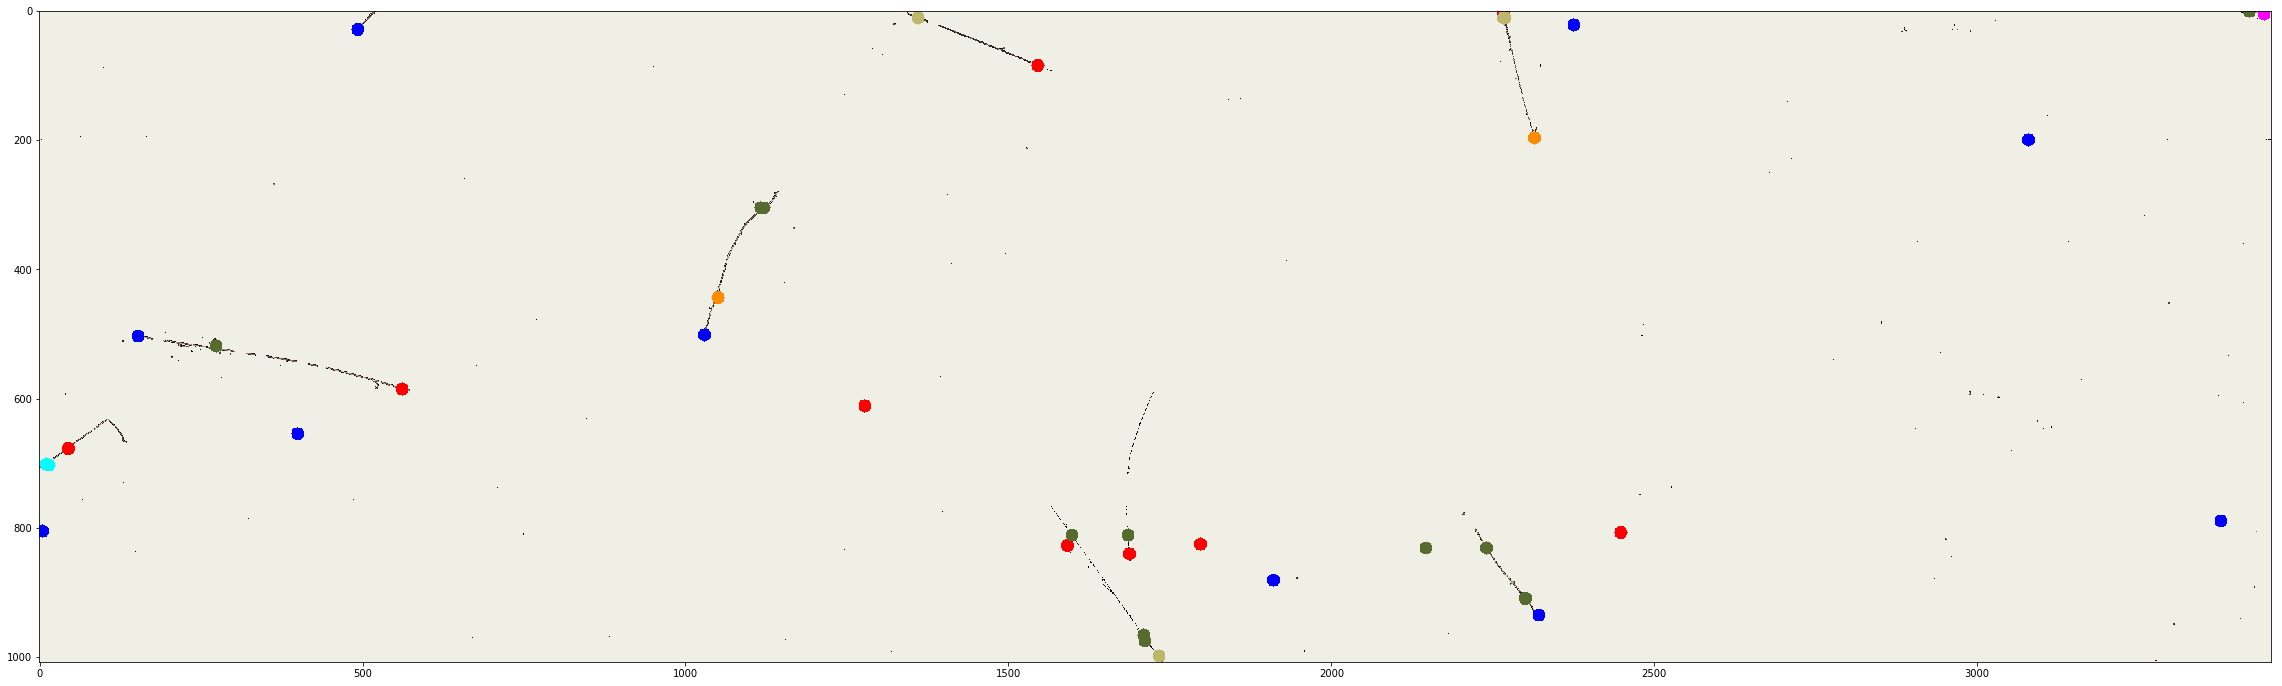

In [22]:
# Plot End points
inputdata = tagger.getInputData()
thrumudata = tagger.getThruMuData()
minpix = 10.0
maxpix = 500.0

for p in range(inputdata.img_v.size()):
    #if p not in [2]:
    #    continue
    
    # mark end points
    print "[ PLANE %d ]"%(p)
    img_cv = make_img( inputdata.img_v.at(p), minpix, maxpix )
    draw_boundary_points(img_cv, thrumudata.side_spacepoint_v )
    draw_boundary_points(img_cv, thrumudata.anode_spacepoint_v )
    draw_boundary_points(img_cv, thrumudata.cathode_spacepoint_v )
    draw_boundary_points(img_cv, thrumudata.imgends_spacepoint_v )
    
    plt.figure(figsize=(40,40))
    plt.imshow( img_cv )

Number of tracks: 10
track #0: number of points = 54
track #1: number of points = 109
track #2: number of points = 30
track #3: number of points = 60
track #4: number of points = 28
track #5: number of points = 102
track #6: number of points = 96
track #7: number of points = 23
track #8: number of points = 66
track #9: number of points = 33


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  


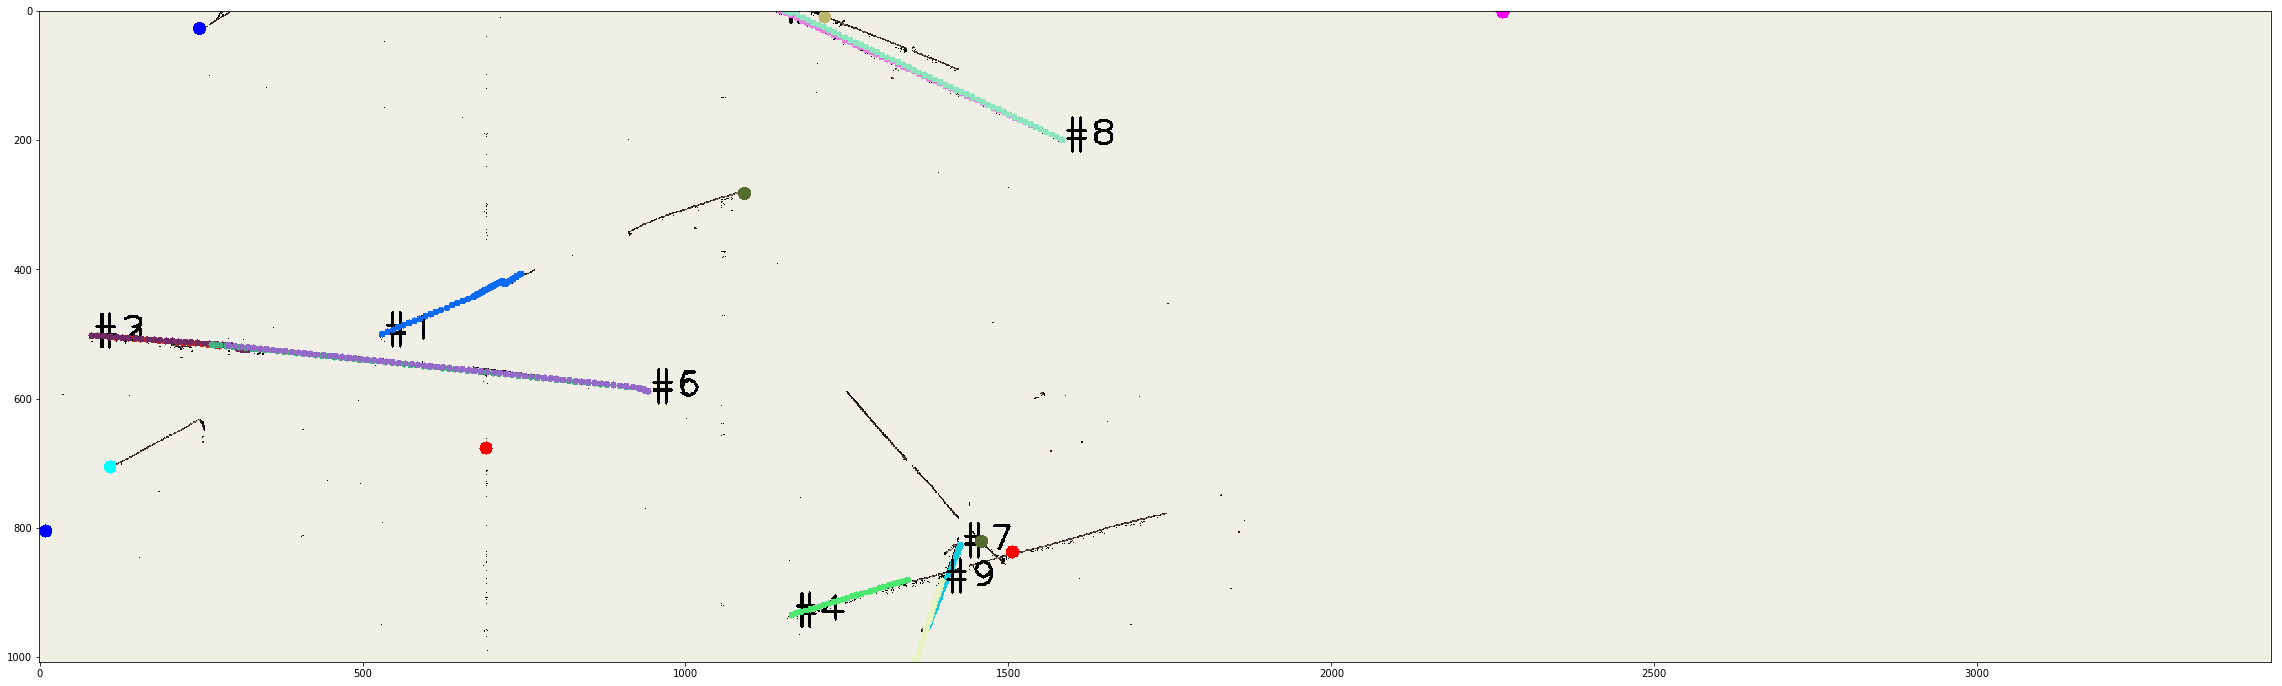

In [ ]:
# ThruMu
thrumutagger_ok = tagger.findThruMuTracks()
tagger.printState()

# RE-RUN THRUMU
# This will re-run ThruMu so that information can be plotted.  This will contain the information of the tracks in 3D.
thrumudata = tagger.getThruMuData()

# Plot the tracks as ThruMu tracks in this notebook.
track_imgs = {}

# Use a 'for' loop to initialize the track images as the input images.  The reconstructed tracks 
# will be placed above them.
for p in range(inputdata.img_v.size()):
    track_imgs[p] = make_img(inputdata.img_v.at(p), 10, 500 )
    
    
# Print out the number of tracks.
print "Number of tracks: %d"% thrumudata.track_v.size()

# Loop through the tracks to plot them in the output.
for itrack in range(thrumudata.track_v.size()):
    track = thrumudata.track_v[itrack]
    npts  = track.NumberTrajectoryPoints();
    print "track #%d: number of points ="%(itrack), npts
    
    # Define the position of the points in a vector of floats that you define.
    fpos = std.vector("float")(3,0)
    
    #randomize color
    randcolor = np.random.randint(0,255,3)
    
    # Loop through the points and add them to the figure.
    for ipt in range(npts):
        # Loop through each of the planes to set 'fpos' with the coordinates of the current point.
        for i in range(3):
            fpos[i] = track.LocationAtPoint(ipt)[i]
        # Declare a variable for the projected image coordinate and then set it by using the 'getProjectedImagePixel' function.
        imgcoord = larcv.UBWireTool.getProjectedImagePixel(fpos, inputdata.img_v.at(p).meta(), 3)
        # Start a loop over the three planes.
        for p in range(3):
            # Use the 'circle' function to draw a circle at the location of the point.
            track_imgs[p] = cv2.circle( track_imgs[p], (imgcoord.at(p+1), imgcoord.at(0)), 5, (randcolor[0],randcolor[1],randcolor[2]), -1 )
            if ipt==0:
                # This places text at the location of the point.
                cv2.putText( track_imgs[p], "#%d"%(itrack), (imgcoord.at(p+1), imgcoord.at(0)+10), cv2.FONT_HERSHEY_PLAIN, 4.0, (0,0,0), 3 )

# Display the images now.
for p in range(inputdata.img_v.size()):
    draw_boundary_points( track_imgs[p], thrumudata.unused_spacepoint_v )
    plt.figure(figsize=(40,80))
    plt.imshow( track_imgs[p] ) 
    
    # Save the images to the file if the flag is true.
    if save_images_to_file:
        plt.savefig('event_%dplane_thrumu_img_%d_.png'% (entry_i, p))

"CosmicTagger State:  Config'd [true] Input [true] BoundaryTag [true] ThruMu [true] StopMu [true] Untagged [false] CROI [false]"

StopMuFilterSpacePoints::StopMuFilterSpacePoints
Filter saved 10 out of 10 end points.
number of non-duplicated endpoints: 10
filter thrumu end points by proximinty to thrumu-tagged pixels
number of non-duplicated, non-thru-mu endpoints: 9
Number of tracks: 6
track#0: number of points = :  3
track#1: number of points = :  6
track#2: number of points = :  10
track#3: number of points = :  7
track#4: number of points = :  5
track#5: number of points = :  5


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  


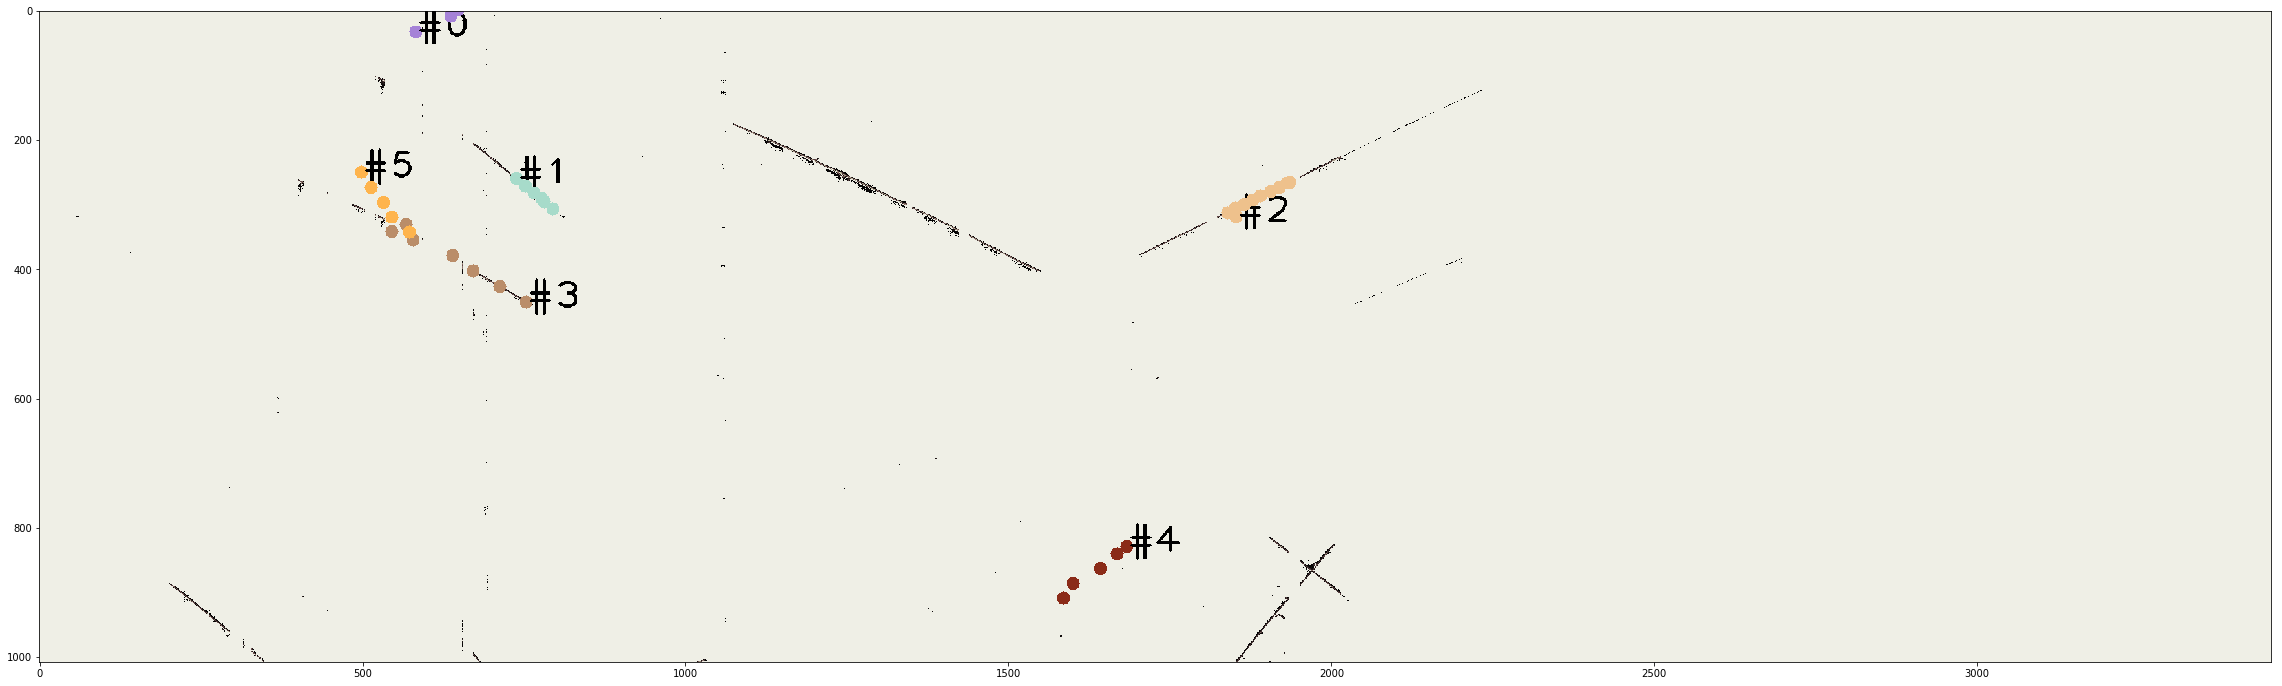

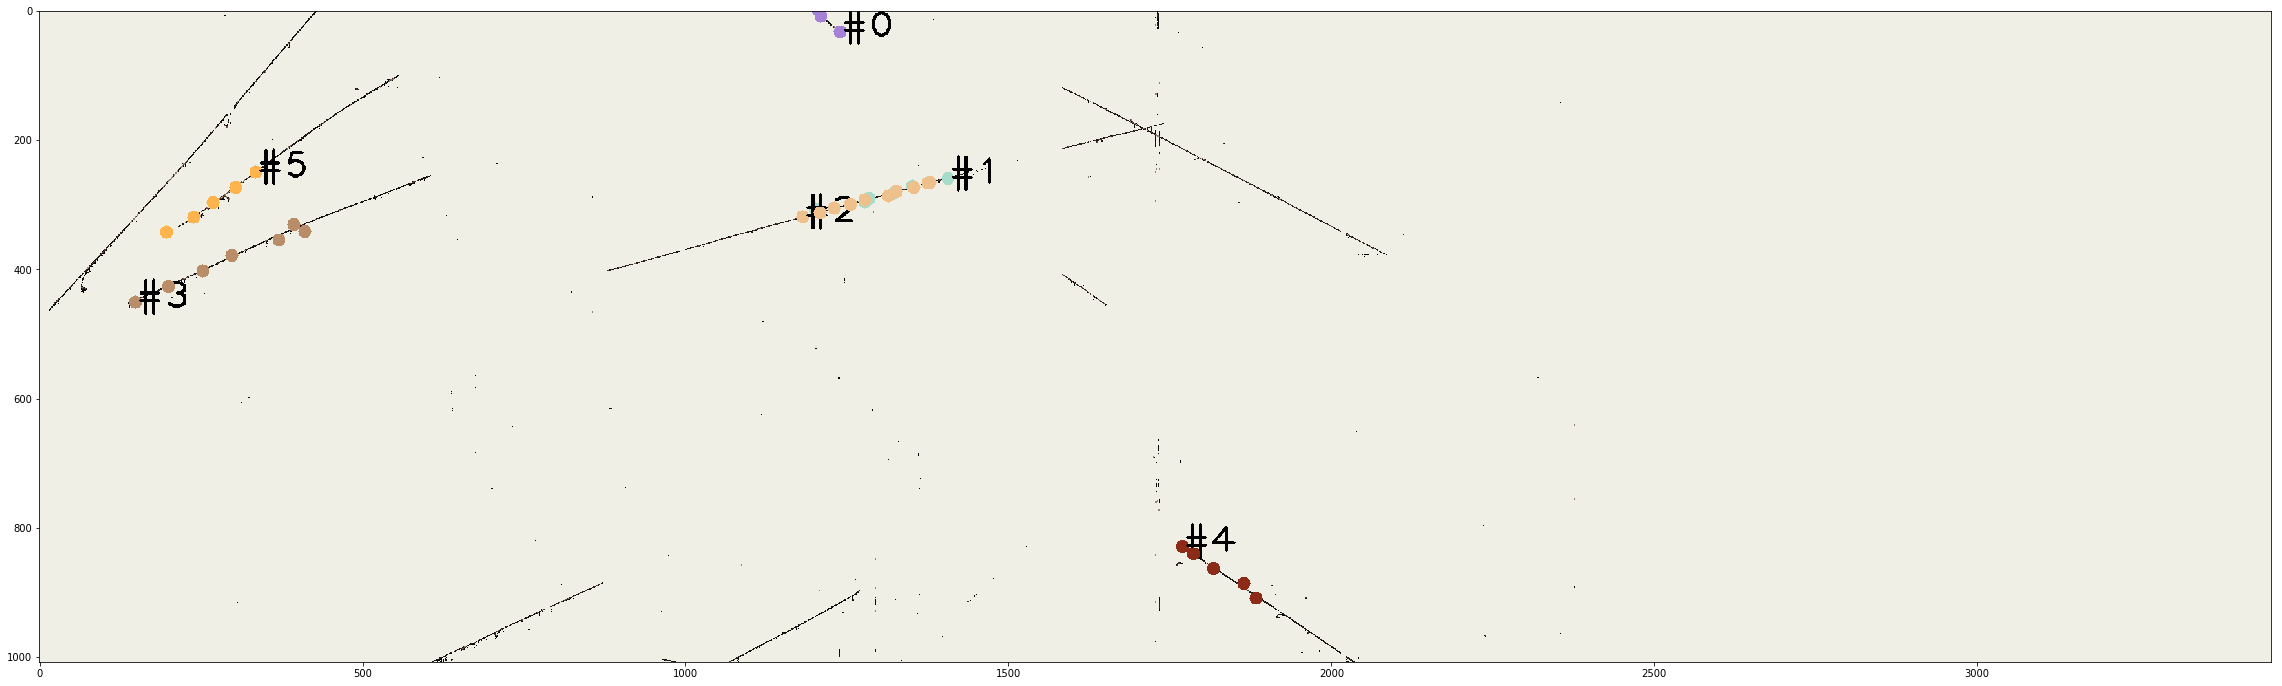

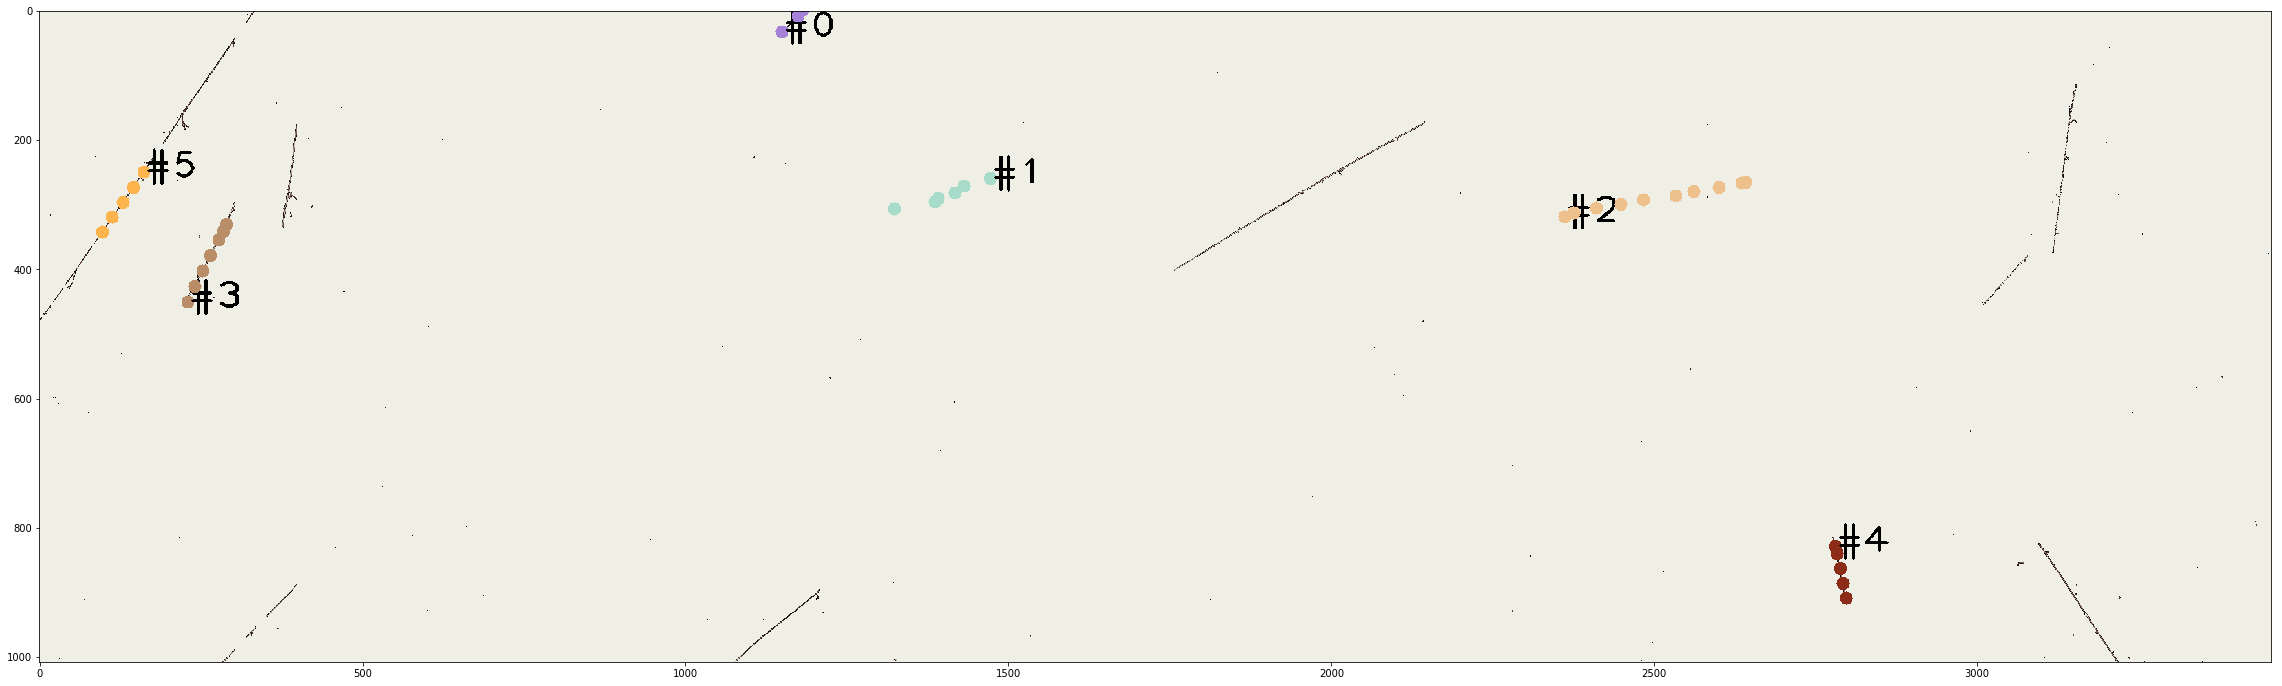

In [12]:
# StopMu
stopmutagger_ok = tagger.findStopMu()
tagger.printState()

# Rerun StopMu here and plot the points.

# First, get the data for each type of track that we are considering.
inputdata = tagger.getInputData()
stopmudata = tagger.getStopMuData()

# Follow the same procedure as for the ThruMu case.  The images have to be remade so that they are only filled with 
# the StopMu points.
track_imgs = {}

# Fill these track images with the original event images, which will be overlaid with the StopMu tracks.
for p in range(inputdata.img_v.size()):
     track_imgs[p] = make_img( inputdata.img_v.at(p), 10, 500 )   


# Print out the number of tracks.  This step has to be run after following each of the previous steps, including the 
# Boundary Point finder.
print "Number of tracks: %d"% stopmudata.track_v.size()

# Start a loop over the tracks.
for itrack in range(stopmudata.track_v.size()):
    # Set a variable for the current track that we are iterating over and its number of trajectory points.
    track = stopmudata.track_v[itrack]
    
    # Define the number of points.
    npts  = track.NumberTrajectoryPoints()
    # Print out the track number and the number of trajectory points.
    print"track#%d: number of points = : "%(itrack), npts
    fpos = std.vector("float")(3,0)
    # randomize the color that the tracks are plotted with.
    randcolor = np.random.randint(0,255,3)
    
    # Loop through the points and plot them on the image.
    for ipt in range(npts):
        # Fill the 'fpos' vector with the coordinates of the point that we are looping over.
        for i in range(3):
            fpos[i] = track.LocationAtPoint(ipt)[i]
        # Use 'UBWireTool' to look at load the turn the 3D point in the detector into an image pixel.
        imgcoord = larcv.UBWireTool.getProjectedImagePixel(fpos, inputdata.img_v.at(p).meta(), 3)
        for p in range(3):
            # Draw a circle at the location of the point.
            track_imgs[p] = cv2.circle( track_imgs[p], (imgcoord.at(p+1), imgcoord.at(0)), 10, (randcolor[0],randcolor[1],randcolor[2]), -1 )
            if ipt==0:
                cv2.putText( track_imgs[p], "#%d"%(itrack), (imgcoord.at(p+1), imgcoord.at(0)+10), cv2.FONT_HERSHEY_PLAIN, 4.0, (0,0,0), 3 )
                
# Display the image.
for p in range(inputdata.img_v.size()):
    #draw_boundary_points( track_imgs[p], thrumudata.unused_spacepoint_v )
    plt.figure(figsize=(40,80))
    plt.imshow( track_imgs[p] ) 
    
    # Save images to the file if the flag is true.
    if save_images_to_file:
        plt.savefig('event_%dplane_stopmu_img_%d_.png'% (entry_i, p))
    
tagger.printState()

Starting the loop.
The track images are being generated.
Number of ThruMu Tracks: 7
Number of StopMu Tracks: 6
track#0: number of points = 92
track#1: number of points = 95
track#2: number of points = 36
track#3: number of points = 67
track#4: number of points = 366
track#5: number of points = 46
track#6: number of points = 287
track #0: number of points = 3
track #1: number of points = 6
track #2: number of points = 10
track #3: number of points = 7
track #4: number of points = 5
track #5: number of points = 5


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  


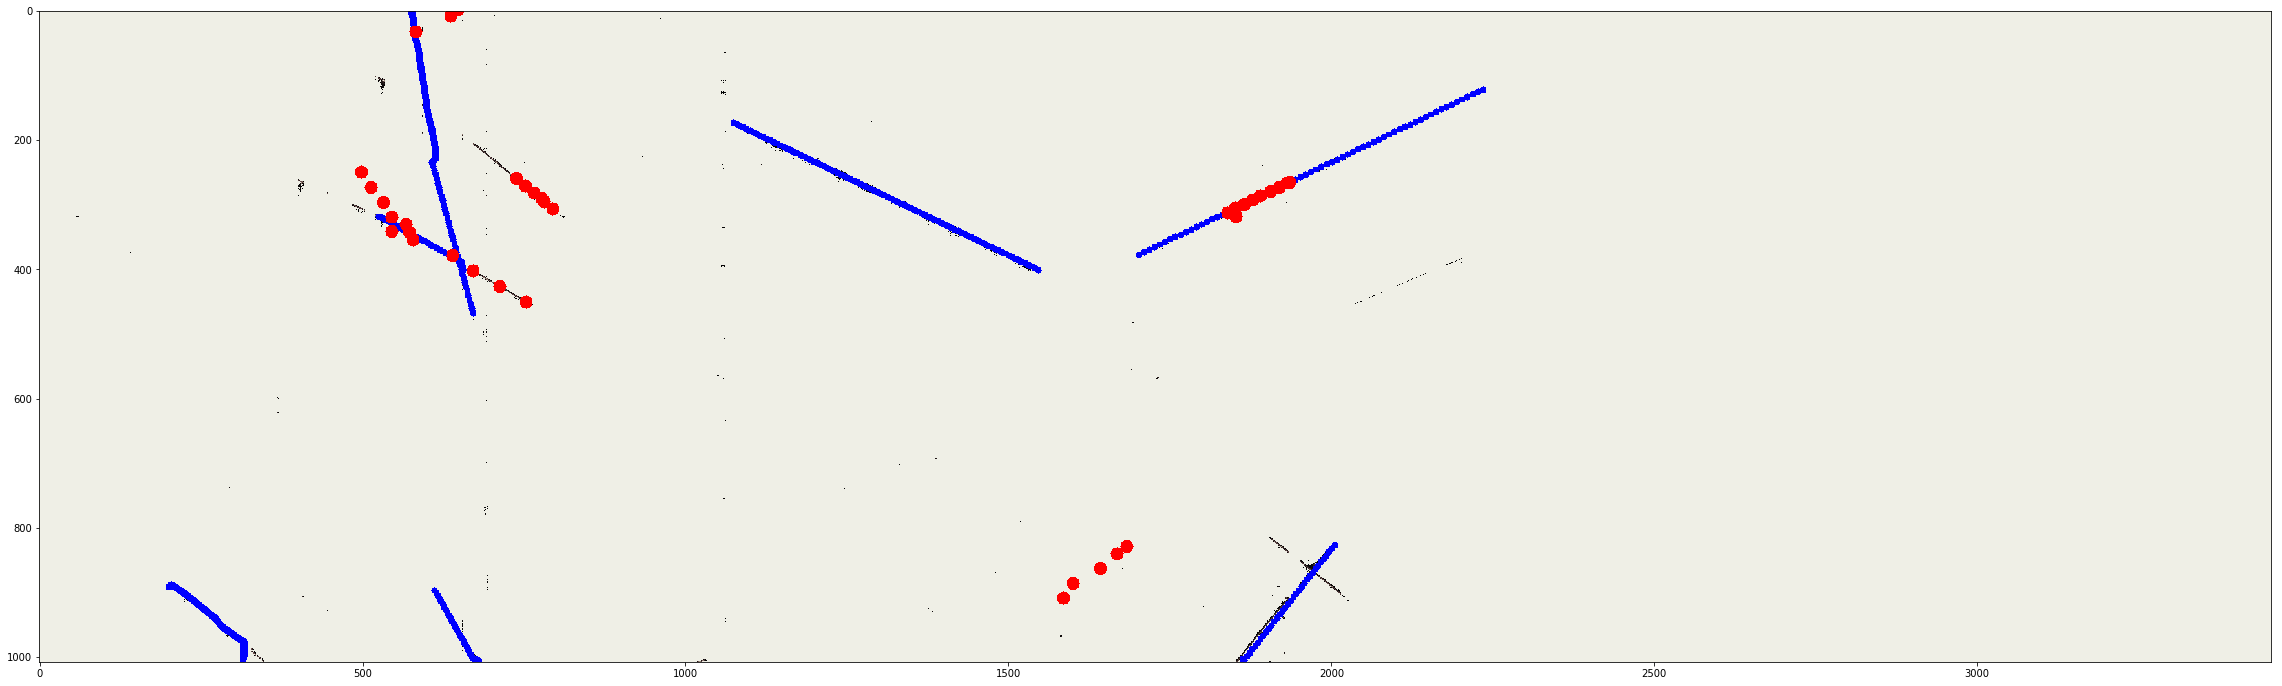

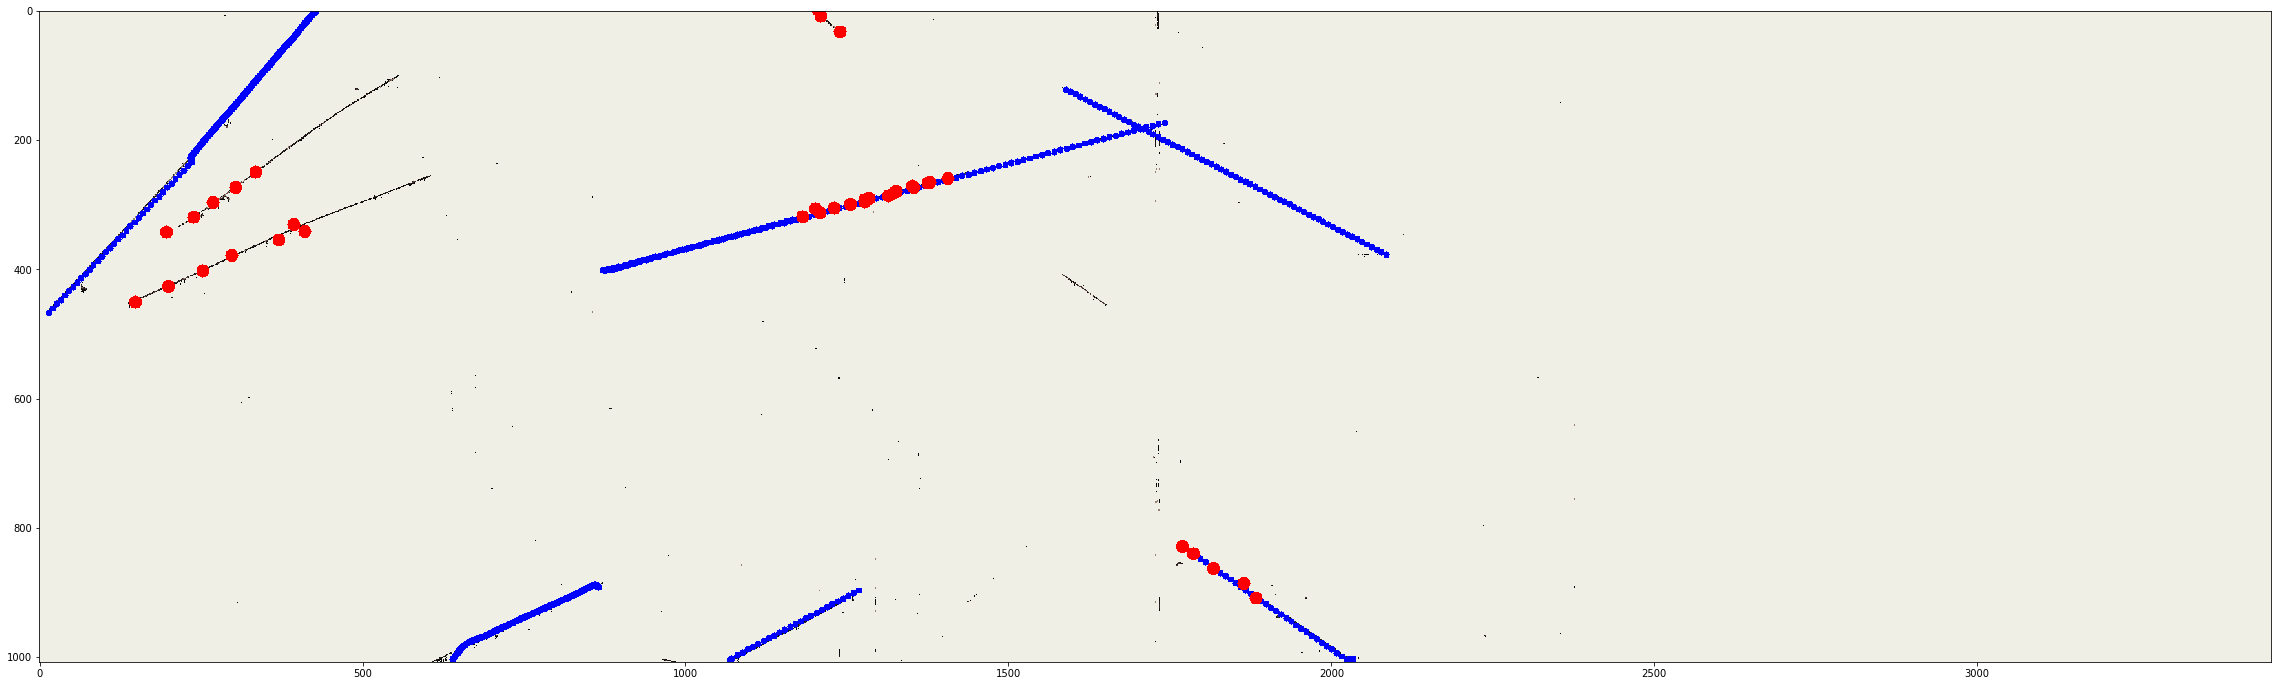

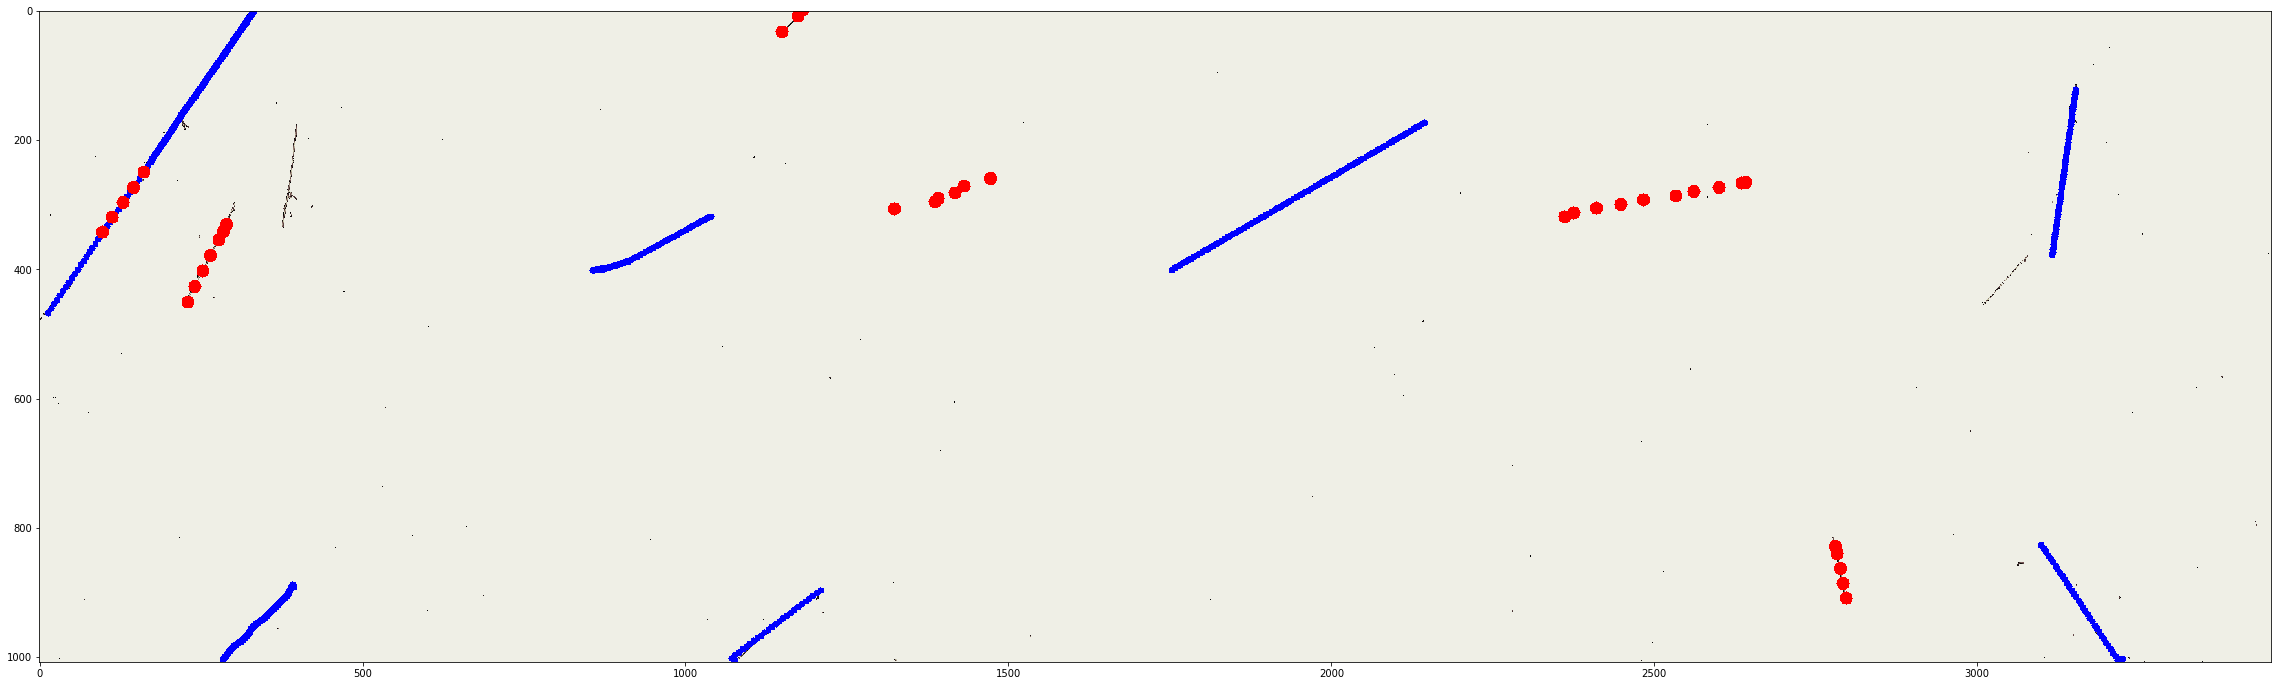

In [13]:
# ThruMu + StopMu
# (Cutting and pasting code - not the best way to do this, but it will work for now)

print "Starting the loop."

# This will re-run ThruMu so that information can be plotted.  This will contain the information of the tracks in 3D.
thrumudata = tagger.getThruMuData()
stopmudata = tagger.getStopMuData()

# Plot the tracks as ThruMu tracks in this notebook.
track_imgs = {}

print "The track images are being generated."

# Use a 'for' loop to initialize the track images as the input images.  The reconstructed tracks 
# will be placed above them.
for p in range(inputdata.img_v.size()):
    track_imgs[p] = make_img(inputdata.img_v.at(p), 10, 500 )
    
# Print out the number of each type of tracks (ThruMu and StopMu, test that the data is being loaded properly).
print "Number of ThruMu Tracks: %d"% thrumudata.track_v.size()
print "Number of StopMu Tracks: %d"% stopmudata.track_v.size()

# Loop through the tracks to plot them in the output.
for itrack in range(thrumudata.track_v.size()):
    track = thrumudata.track_v[itrack]
    npts  = track.NumberTrajectoryPoints();
    print "track#%d: number of points ="%(itrack), npts
    
    fpos = std.vector("float")(3,0)
    
    #randomize color
    randcolor = np.random.randint(0,255,3)
    
    # Loop through the ThruMu points and to add them to the figure.
    for ipt in range(npts):
        # Loop through each of the planes to set 'fpos' with the coordinates of the current point.
        for i in range(3):
            fpos[i] = track.LocationAtPoint(ipt)[i]
        # Declare a variable for the projected image coordinate and then set it by using the 'getProjectedImagePixel' function.
        imgcoord = larcv.UBWireTool.getProjectedImagePixel(fpos, inputdata.img_v.at(p).meta(), 3)
        # Start a loop over the three planes.
        for p in range(3):
            # Use the 'circle' function to draw a circle at the location of the point.
            track_imgs[p] = cv2.circle( track_imgs[p], (imgcoord.at(p+1), imgcoord.at(0)), 5, (0, 0, 255), -1 )
            # if ipt==0:
                # This places text at the location of the point.
                # cv2.putText( track_imgs[p], "#%d"%(itrack), (imgcoord.at(p+1), imgcoord.at(0)+10), cv2.FONT_HERSHEY_PLAIN, 4.0, (0,0,0), 3 )

# Use an identical loop for the StopMu tracks.
for itrack in range(stopmudata.track_v.size()):
    track = stopmudata.track_v[itrack]
    npts = track.NumberTrajectoryPoints()
    print "track #%d: number of points ="%(itrack),npts
    fpos = std.vector("float")(3,0)
    #randomize color
    randcolor = np.random.randint(0,255,3)
    for ipt in range(npts):
        for i in range(3):
            fpos[i] = track.LocationAtPoint(ipt)[i]
        imgcoord = larcv.UBWireTool.getProjectedImagePixel(fpos, inputdata.img_v.at(p).meta(), 3)
        for p in range(3):
            track_imgs[p] = cv2.circle( track_imgs[p], (imgcoord.at(p+1), imgcoord.at(0)), 10, (255, 0, 0), -1 )
            # if ipt==0:
                # cv2.putText( track_imgs[p], "#%d"%(itrack), (imgcoord.at(p+1), imgcoord.at(0)+10), cv2.FONT_HERSHEY_PLAIN, 4.0, (0,0,0), 3 )
                
for p in range(inputdata.img_v.size()):
    # Plot both pieces of information.
    #draw_boundary_points( track_imgs[p], thrumudata.unused_spacepoint_v )
    plt.figure(figsize=(40,80))
    plt.imshow( track_imgs[p] ) 
    if save_images_to_file:
        plt.savefig('event_%dplane_thrumu_and_stopmu_img_%d_.png'% (entry_i, p))


In [14]:
# Introduce the CROI Stage.
tagger.findCROI()
tagger.printState()

"CosmicTagger State:  Config'd [true] Input [true] BoundaryTag [true] ThruMu [true] StopMu [true] Untagged [true] CROI [true]"

ClusterGroupAlgo::MakeClusterGroups: number of clusters
 plane 0: 171
 plane 1: 199
 plane 2: 169
ClusterGroupAlgo::MakeClusterGroups: number of links
 plane 0: 2
 plane 1: 0
 plane 2: 0
ClusterGroupAlgo::MakeClusterGroups: number of groups
Plane 0 Group #0, 1 clusters: 11  range: [7836,7680] width=26
Plane 0 Group #1, 1 clusters: 29  range: [7218,6906] width=52
Plane 0 Group #2, 3 clusters: 128 133 138  range: [3558,3006] width=92
Plane 1 Group #0, 1 clusters: 1  range: [8448,8274] width=29
Plane 1 Group #1, 1 clusters: 16  range: [7842,6966] width=146
Plane 1 Group #2, 1 clusters: 46  range: [6918,6462] width=76
Plane 1 Group #3, 1 clusters: 67  range: [6000,5712] width=48
Plane 1 Group #4, 1 clusters: 191  range: [2490,2406] width=14
Plane 2 Group #0, 1 clusters: 17  range: [7452,6432] width=170
Plane 2 Group #1, 1 clusters: 64  range: [6180,5718] width=77
VOL: clgroup[1,1,0]  numslices=11 goodslices=11 fracgood=1 planecharge=[6960.06,6367.07,8835.13]
Reclustered Contained Tracks fr

In [15]:
# Run the CROI Stage.
croidata = tagger.getCROIData()
print "Number of CROIs: %d" %croidata.croi_v.size()

Number of CROIs: 8


Tracks From Untagged Clustering: 1
track#0: number of points = 11


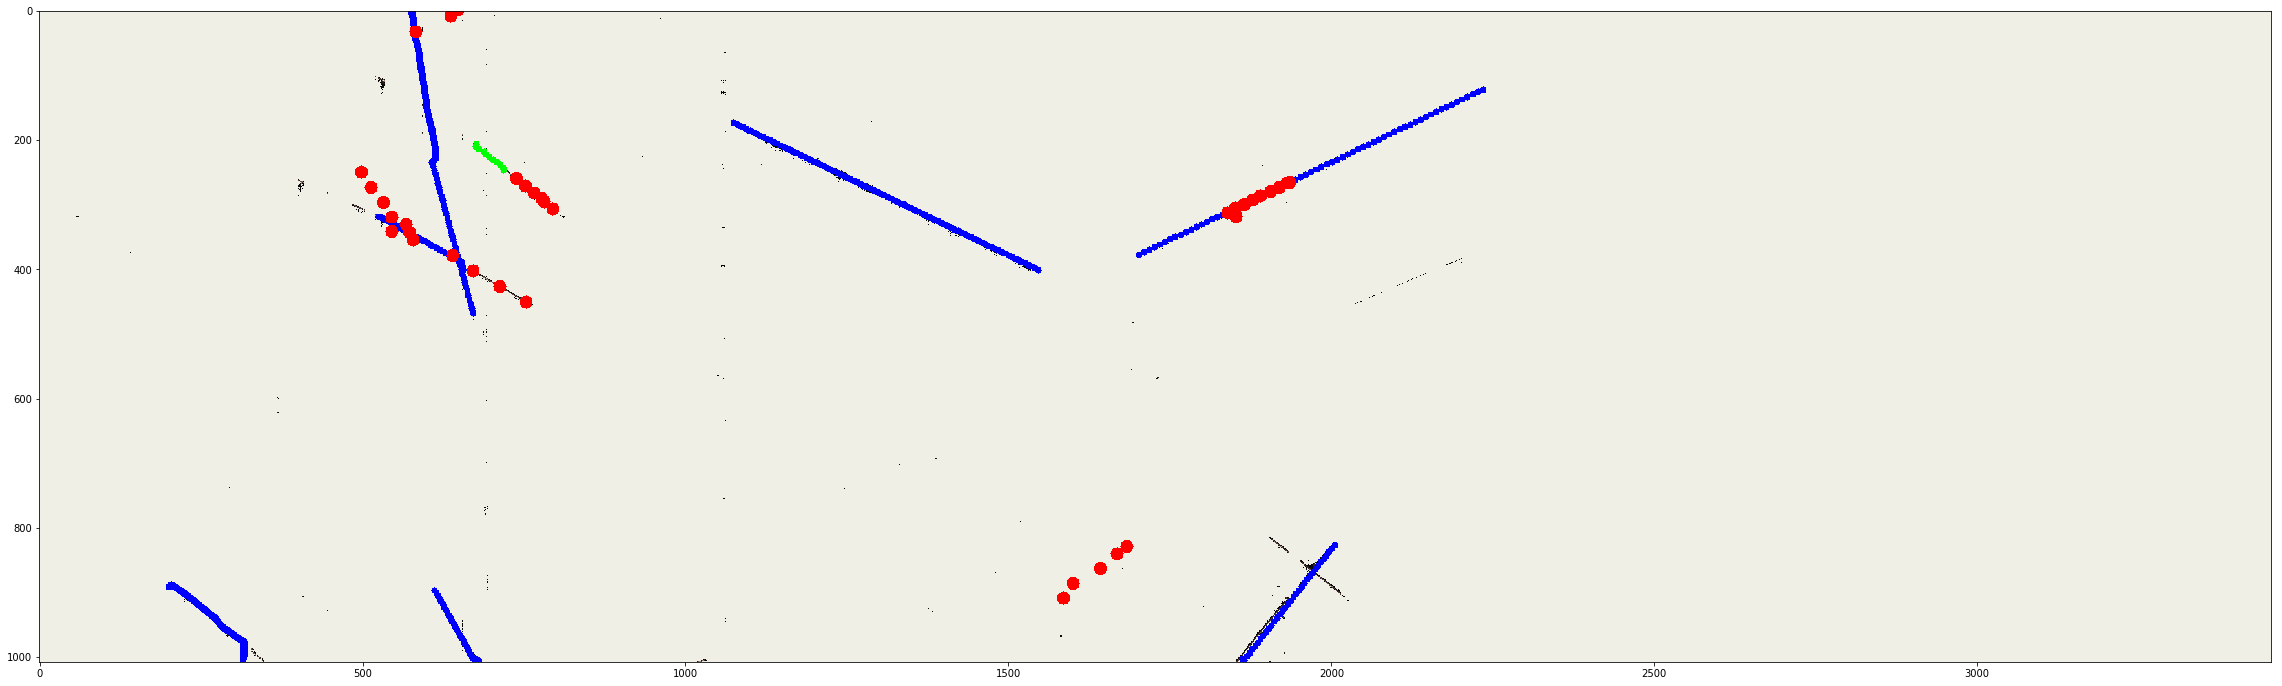

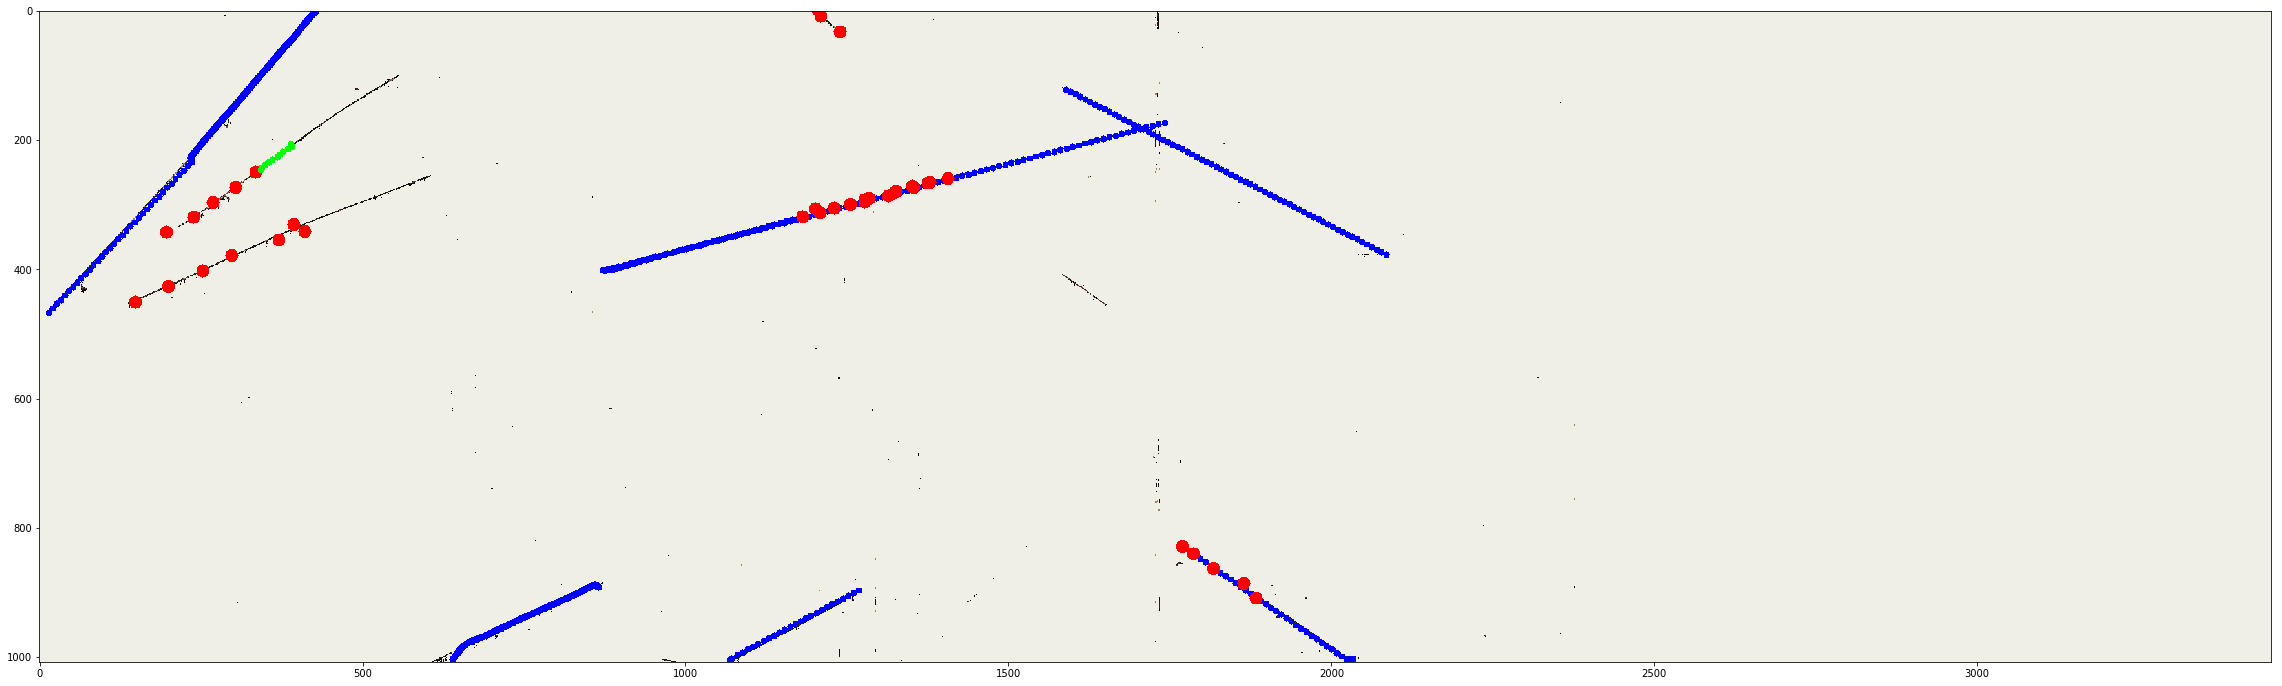

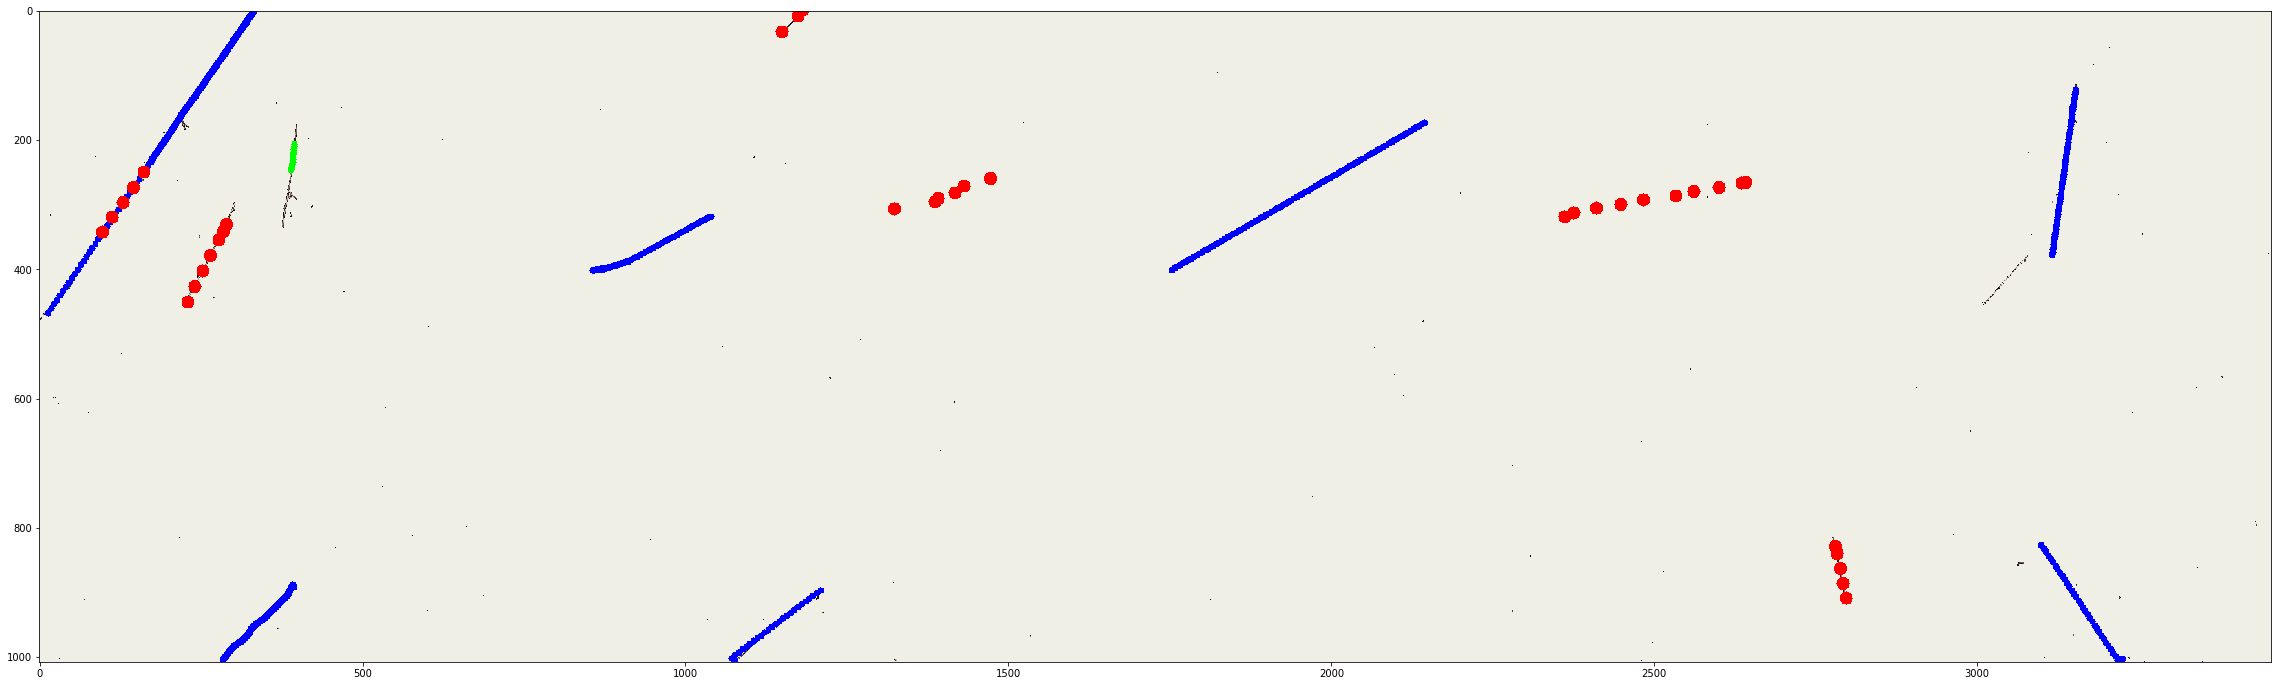

In [16]:
# ThruMu + StopMu + Untagged 
print "Tracks From Untagged Clustering: %d"%(croidata.contained_tracks_v.size())

# Draw the tracks from Untagged Clustering in the same image as the ThruMu and the StopMu Tracks.
# The 'track_imgs' from the previous box can be used.

# Use a loop to draw these tracks on the old set of images.
for itrack in range(croidata.contained_tracks_v.size()):
    
    track = croidata.contained_tracks_v[itrack]
    npts  = track.m_track3d.NumberTrajectoryPoints();
    print "track#%d: number of points ="%(itrack), npts
    
    # Loop through the ThruMu points and to add them to the figure.
    for ipt in range(npts):
        # Loop through each of the planes to set 'fpos' with the coordinates of the current point.
        for i in range(3):
            fpos[i] = track.m_track3d.LocationAtPoint(ipt)[i]
        # Declare a variable for the projected image coordinate and then set it by using the 'getProjectedImagePixel' function.
        imgcoord = larcv.UBWireTool.getProjectedImagePixel(fpos, inputdata.img_v.at(p).meta(), 3)
        # Start a loop over the three planes.
        for p in range(3):
            # Use the 'circle' function to draw a circle at the location of the point.
            track_imgs[p] = cv2.circle( track_imgs[p], (imgcoord.at(p+1), imgcoord.at(0)), 5, (0, 255, 0), -1 )
            
for p in range(inputdata.img_v.size()):
    plt.figure(figsize=(40,80))
    plt.imshow( track_imgs[p] )


CROI #0:
min y row coord: 94
max y row coord: 481
min x col coord on plane #0: 787
max x col coord on plane #0: 1834


min x col coord on plane #1: 787
max x col coord on plane #1: 1833


min x col coord on plane #2: 1687
max x col coord on plane #2: 2212


Entering ThruMu.
Entering StopMu.
Entering the Untagged stage......
CROI #1:
min y row coord: 239
max y row coord: 482
min x col coord on plane #0: 343
max x col coord on plane #0: 837


min x col coord on plane #1: 782
max x col coord on plane #1: 1276


min x col coord on plane #2: 790
max x col coord on plane #2: 1106


Entering ThruMu.
Entering StopMu.
Entering the Untagged stage......
CROI #2:
min y row coord: 43
max y row coord: 457
min x col coord on plane #0: 1611
max x col coord on plane #0: 2326


min x col coord on plane #1: 1480
max x col coord on plane #1: 2195


min x col coord on plane #2: 3050
max x col coord on plane #2: 3220


Entering ThruMu.
Entering StopMu.
Entering the Untagged stage......
CROI #3:
min y row co

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  


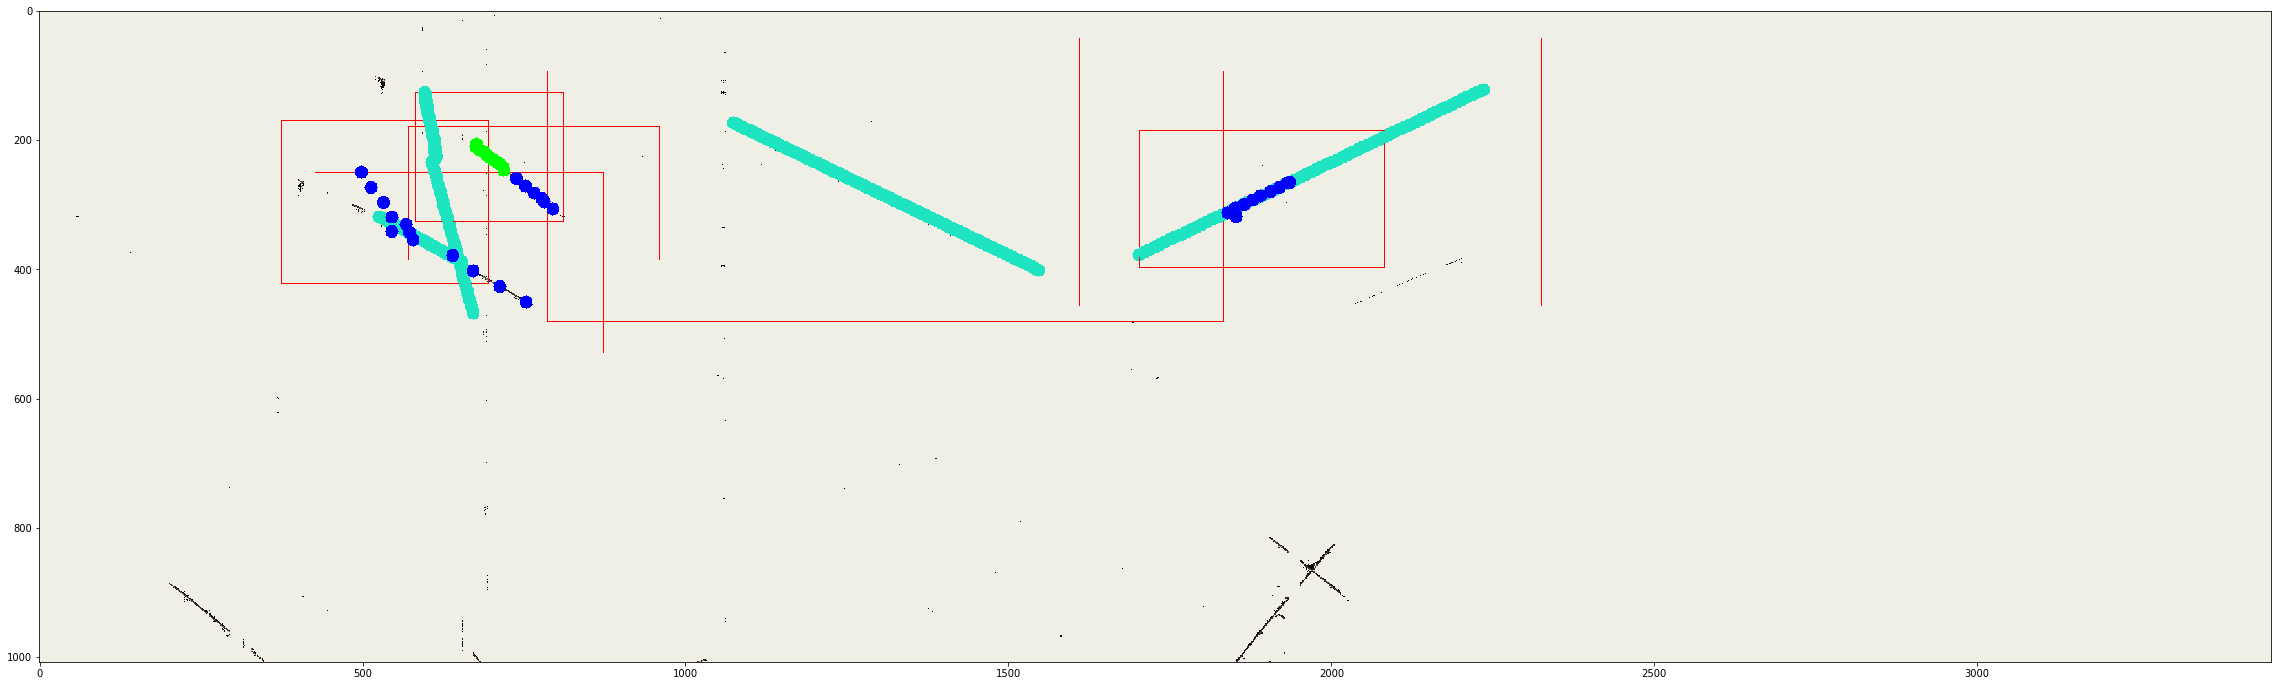

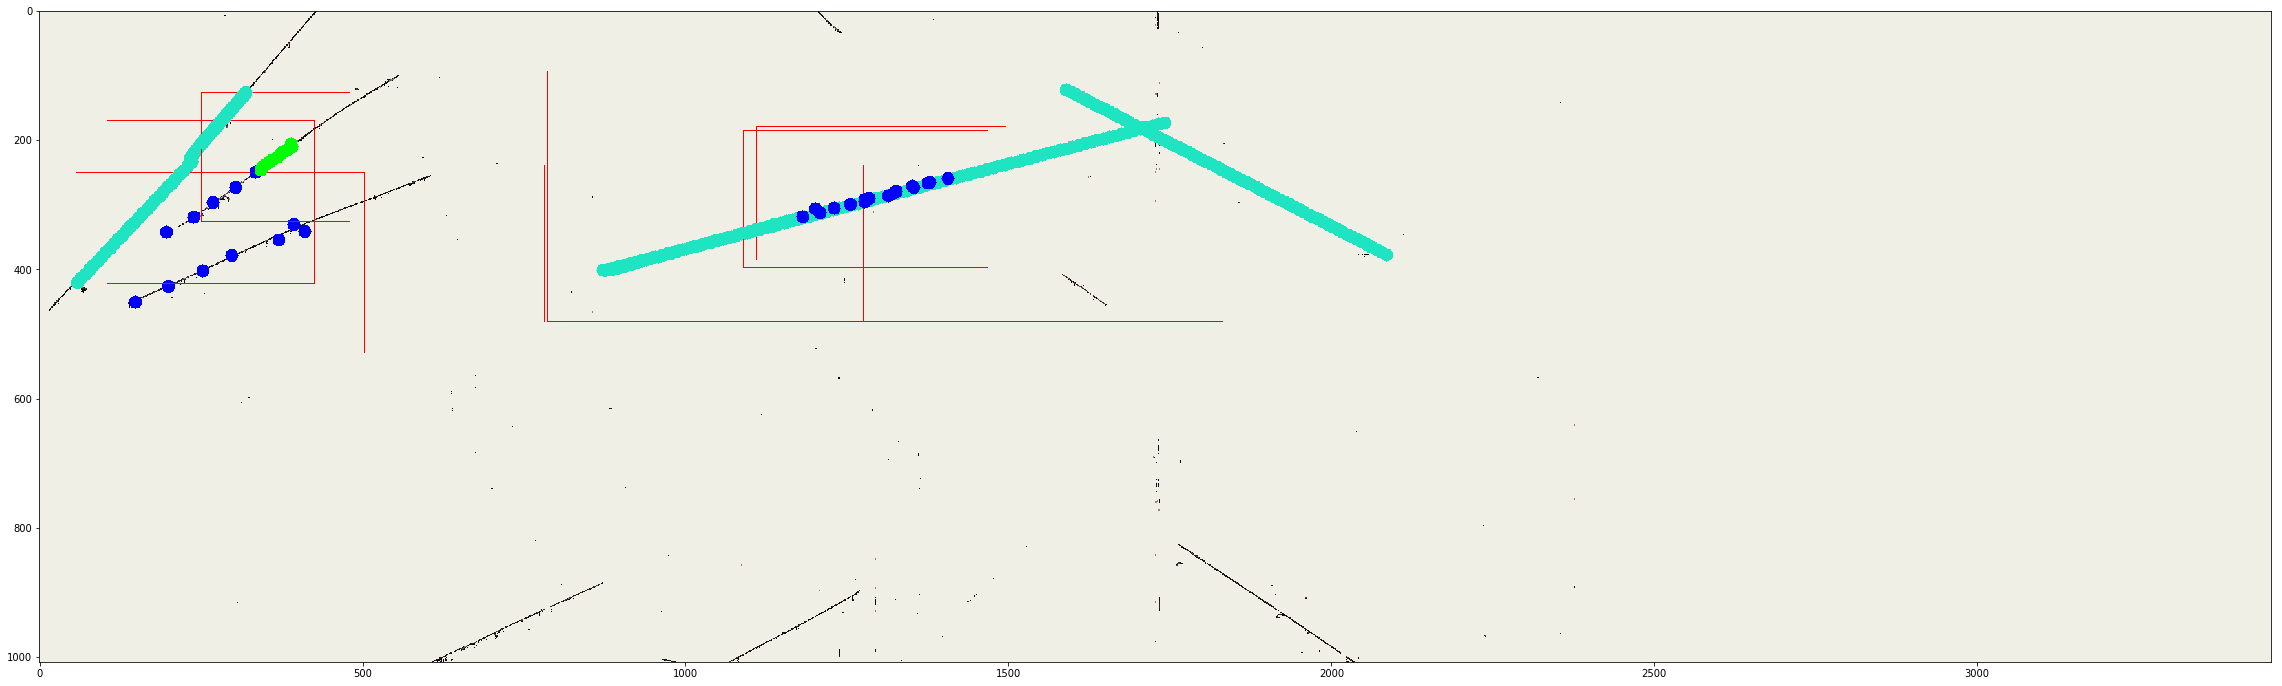

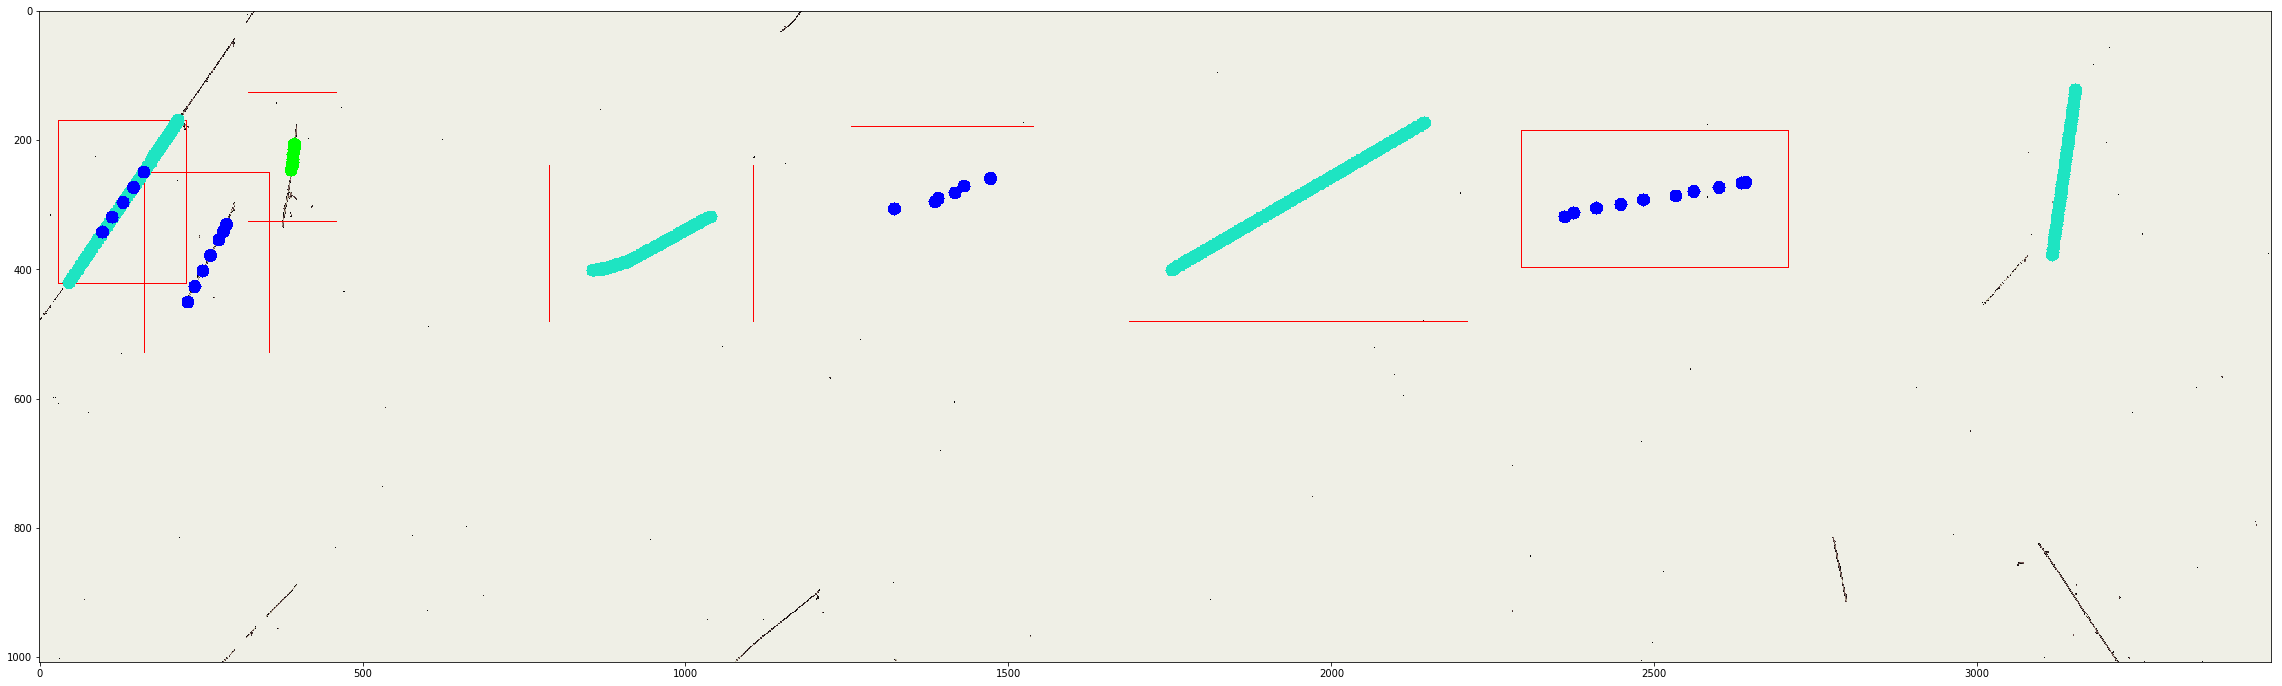

In [17]:
# CROI + Tracks of All Varieties Inside the CROI

# Declare a vector for the input images.
track_imgs = {}

# Use a 'for' loop to initialize the track images as the input images.  The reconstructed tracks 
# will be placed above them.
for p in range(inputdata.img_v.size()):
    track_imgs[p] = make_img(inputdata.img_v.at(p), 10, 500 )

# Declare random color.
randcolor = np.random.randint(0,255,3)

# Draw the bounding box on the plane image for each of the planes

# Use a loop to draw a rectangle for each of the CROIs.
for roi_i in range(croidata.croi_v.size()):
    
    # Convert the (tick, wire) coordinates to (column, wire) coordinates.
    
    # The rows in the image for the vertices of the CROI
    # VERY IMPORTANT: The greater tick number corresponds to the smaller row number, and vice-versa.  
    max_y_row = inputdata.img_v.at(0).meta().row( croidata.croi_v[roi_i].BB(0).min_y() )
    min_y_row = inputdata.img_v.at(0).meta().row( croidata.croi_v[roi_i].BB(0).max_y() )
    
    print "CROI #%d:"% roi_i
    
    print "min y row coord: %d" %(int(min_y_row))
    print "max y row coord: %d" %(int(max_y_row))
    
    # Declare a vector of floats for the minimum and maximum column values in the image
    min_x_col = std.vector("float")(3,0)
    max_x_col = std.vector("float")(3,0)   
    
    # Loop over the three planes and reset the columns based on which plane you are in.
    for p in range(inputdata.img_v.size()):
    
        # Set the new values of the column according to which plane you are in.    
        min_x_col[p] = inputdata.img_v.at(0).meta().col( croidata.croi_v[roi_i].BB(p).min_x() )
        max_x_col[p] = inputdata.img_v.at(0).meta().col( croidata.croi_v[roi_i].BB(p).max_x() )
        
        # Print out this information.
        print "min x col coord on plane #%d: %d" %(p, int(min_x_col[p]))
        print "max x col coord on plane #%d: %d" %(p, int(max_x_col[p]))
    
        print "\n"
    
        # Plot a rectangle on each of the planes.
        track_imgs[p] = cv2.rectangle(track_imgs[p], (int(min_x_col[p]), int(min_y_row)), (int(max_x_col[p]), int(max_y_row)), (255, 0, 0), 1)
    
    # Write a loop that will color the pixels that are located in the CROI.
    # Loop through the stopmu tracks and the thrumu tracks.

    # Use the 'fpos' vector again.
    fpos = std.vector("float")(3,0)

    print "Entering ThruMu."
    # ThruMu 
    for thrumu_i in range(thrumudata.track_v.size()):
    
        # Declare a variable for the thrumu track.
        thrumutrack = thrumudata.track_v[thrumu_i]
    
        # Declare a variable for the number of points.
        npts = thrumutrack.NumberTrajectoryPoints()
    
        for pt in range(npts):
        
            # Declare a variable for the position of the point on the track.
            for i in range(3):   
                fpos[i] = thrumutrack.LocationAtPoint(pt)[i]
            
            # Convert this to a set of pixel coordinates.
            imgcoord = larcv.UBWireTool.getProjectedImagePixel(fpos, inputdata.img_v.at(p).meta(), 3)
        
            # Check to see if the time coordinate is out of the CROI.  Each of the points in the plane have the same time coordinate.
            if imgcoord.at(0) < min_y_row or imgcoord.at(0) > max_y_row:
                
                # Continue in the loop over the points if the time coordinate is out of range.
                continue
            
            # Loop through each of planes to check if the coordinates are located within the CROI.
            for plane_i in range(inputdata.img_v.size()):
                
                # Draw a circle if the pixel is within the CROI in that plane according to its coordinates.
                if imgcoord.at(plane_i+1) > min_x_col[plane_i] and imgcoord.at(plane_i+1) < max_x_col[plane_i]:
            
                    # Place the points on the track as circles.
                    track_imgs[plane_i] = cv2.circle( track_imgs[plane_i], (imgcoord.at(plane_i+1), imgcoord.at(0)), 10, (randcolor[0],randcolor[1],randcolor[2]), -1 )
            
    print "Entering StopMu."
    # StopMu 
    for stopmu_i in range(stopmudata.track_v.size()):
    
        # Declare a variable for the StopMu track.
        stopmutrack = stopmudata.track_v[stopmu_i]
    
        # Declare a variable for the number of points.
        npts = stopmutrack.NumberTrajectoryPoints()
    
        # Loop over the points in the diagram.
        for pt in range(npts):
        
            for i in range(3):   
                fpos[i] = stopmutrack.LocationAtPoint(pt)[i]
            
            # Convert this to a set of pixel coordinates.
            imgcoord = larcv.UBWireTool.getProjectedImagePixel(fpos, inputdata.img_v.at(p).meta(), 3)
            
            # Check to see if the time coordinate is out of the CROI.  Each of the points in the plane have the same time coordinate.
            if imgcoord.at(0) < min_y_row or imgcoord.at(0) > max_y_row:
                             
                # Continue in the loop over the points if the time coordinate is out of range.
                continue
            
            # Loop through each of planes to check if the coordinates are located within the CROI.
            for plane_i in range(inputdata.img_v.size()):
                
                # Draw a circle if the pixel is within the CROI in that plane according to its coordinates.
                if imgcoord.at(plane_i+1) > min_x_col[plane_i] and imgcoord.at(plane_i+1) < max_x_col[plane_i]:
            
                    track_imgs[plane_i] = cv2.circle( track_imgs[plane_i], (imgcoord.at(plane_i+1), imgcoord.at(0)), 10, (0, 0, 255), -1 )
    
    print "Entering the Untagged stage......"
    # Untagged 
    for untagged_i in range(croidata.contained_tracks_v.size()):
    
        # Declare a variable for the StopMu track.
        untagged_track = croidata.contained_tracks_v[untagged_i]
    
        # Declare a variable for the number of points.
        npts = untagged_track.m_track3d.NumberTrajectoryPoints()
    
        # Loop over the points in the diagram.
        for pt in range(npts):
        
            for i in range(3):   
                fpos[i] = untagged_track.m_track3d.LocationAtPoint(pt)[i]
            
            # Convert this to a set of pixel coordinates.
            imgcoord = larcv.UBWireTool.getProjectedImagePixel(fpos, inputdata.img_v.at(p).meta(), 3)
            
            # Check to see if the time coordinate is out of the CROI.  Each of the points in the plane have the same time coordinate.
            if imgcoord.at(0) < min_y_row or imgcoord.at(0) > max_y_row:
                             
                # Continue in the loop over the points if the time coordinate is out of range.
                continue
            
            # Loop through each of planes to check if the coordinates are located within the CROI.
            for plane_i in range(inputdata.img_v.size()):
                
                # Draw a circle if the pixel is within the CROI in that plane according to its coordinates.
                if imgcoord.at(plane_i+1) > min_x_col[plane_i] and imgcoord.at(plane_i+1) < max_x_col[plane_i]:
            
                    track_imgs[plane_i] = cv2.circle( track_imgs[plane_i], (imgcoord.at(plane_i+1), imgcoord.at(0)), 10, (0, 255, 0), -1 )
    

# Plot the information on each of the planes.
for p in range(inputdata.img_v.size()):
    
    plt.figure(figsize=(40,80))
    plt.imshow( track_imgs[p] ) 
    
    # Save the information to a file if the flag is raised.
    if save_images_to_file:
        plt.savefig('event_%dplane_CROI_and_tagged_pixels_img_%d_.png'% (entry_i, p))

